In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [2]:
!pip install missingno category_encoders xgboost


In [3]:
data = pd.read_csv("Data/data.csv")  # Keep your working path


In [4]:
data.shape


(11914, 16)

In [5]:
data.shape

(11914, 16)

In [6]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


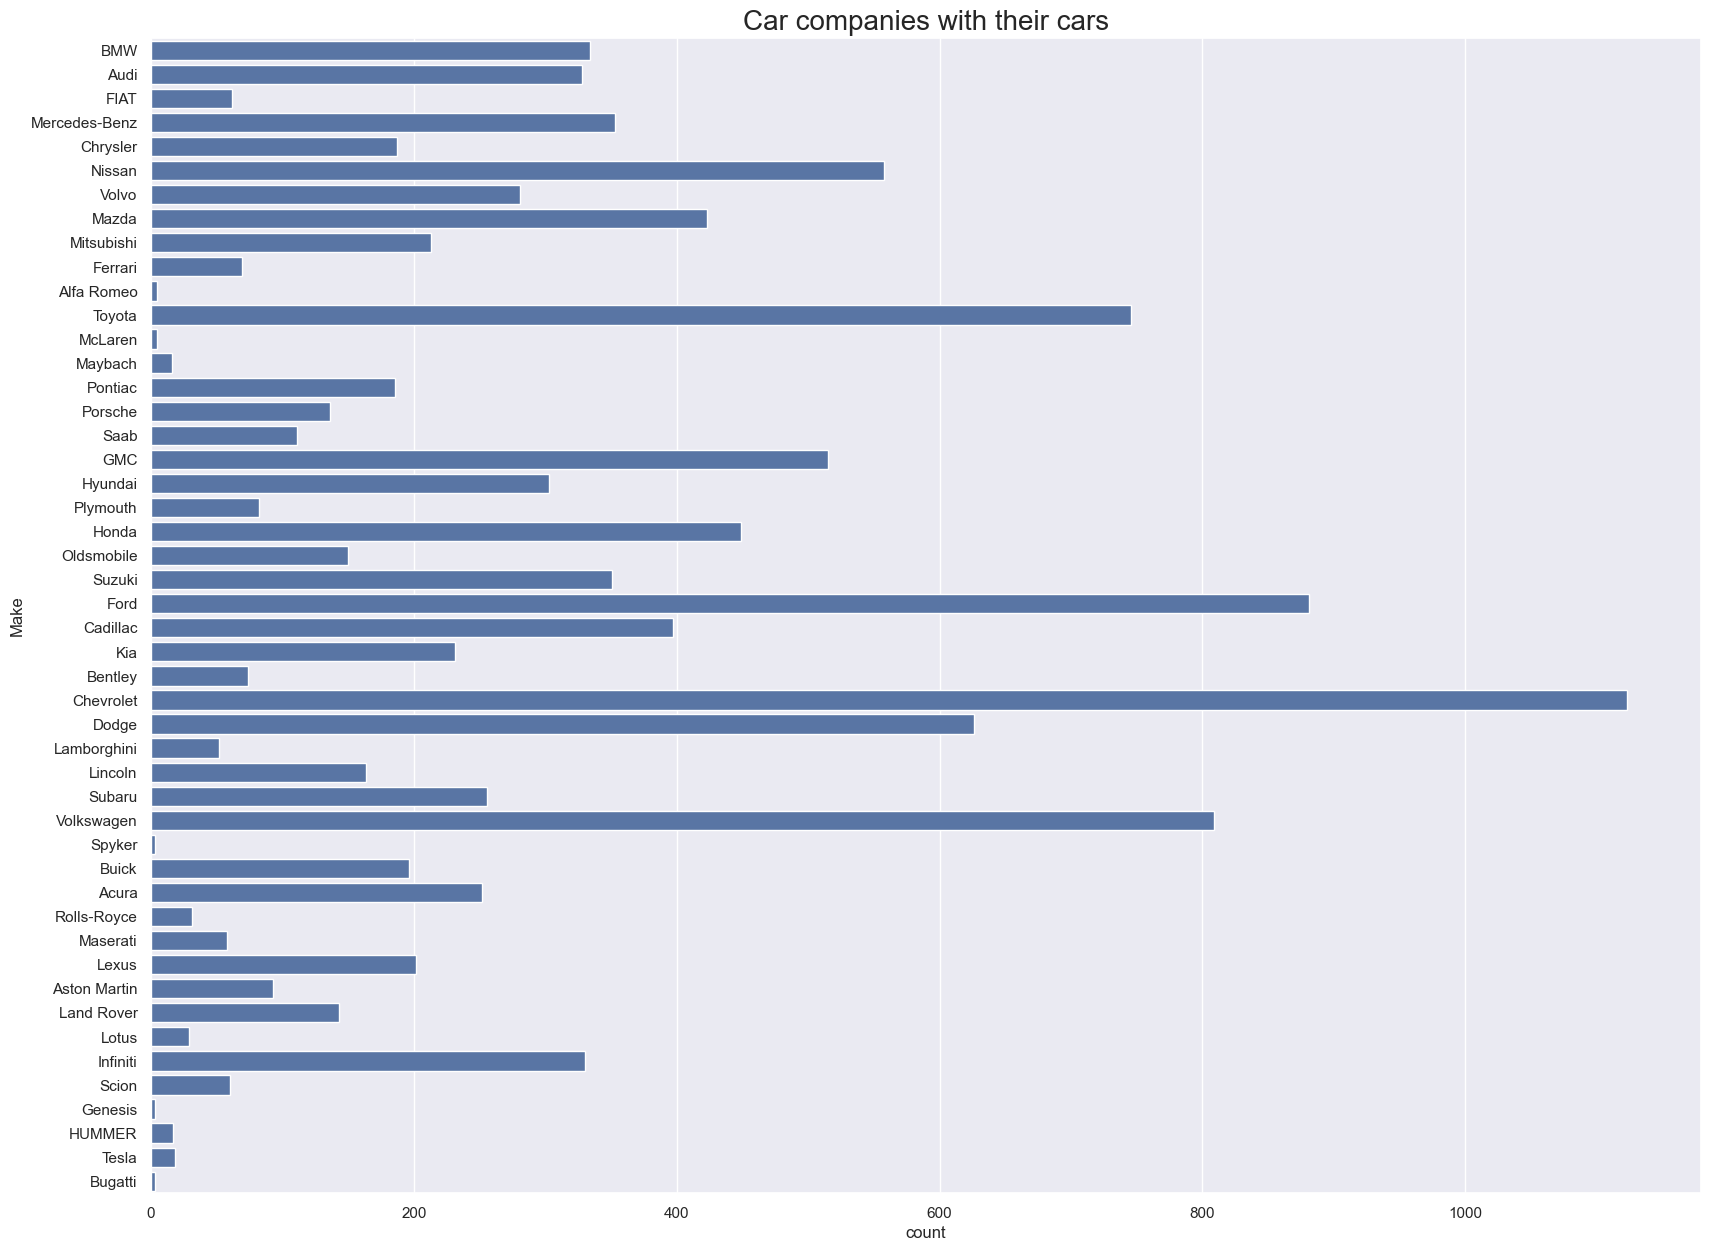

In [7]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

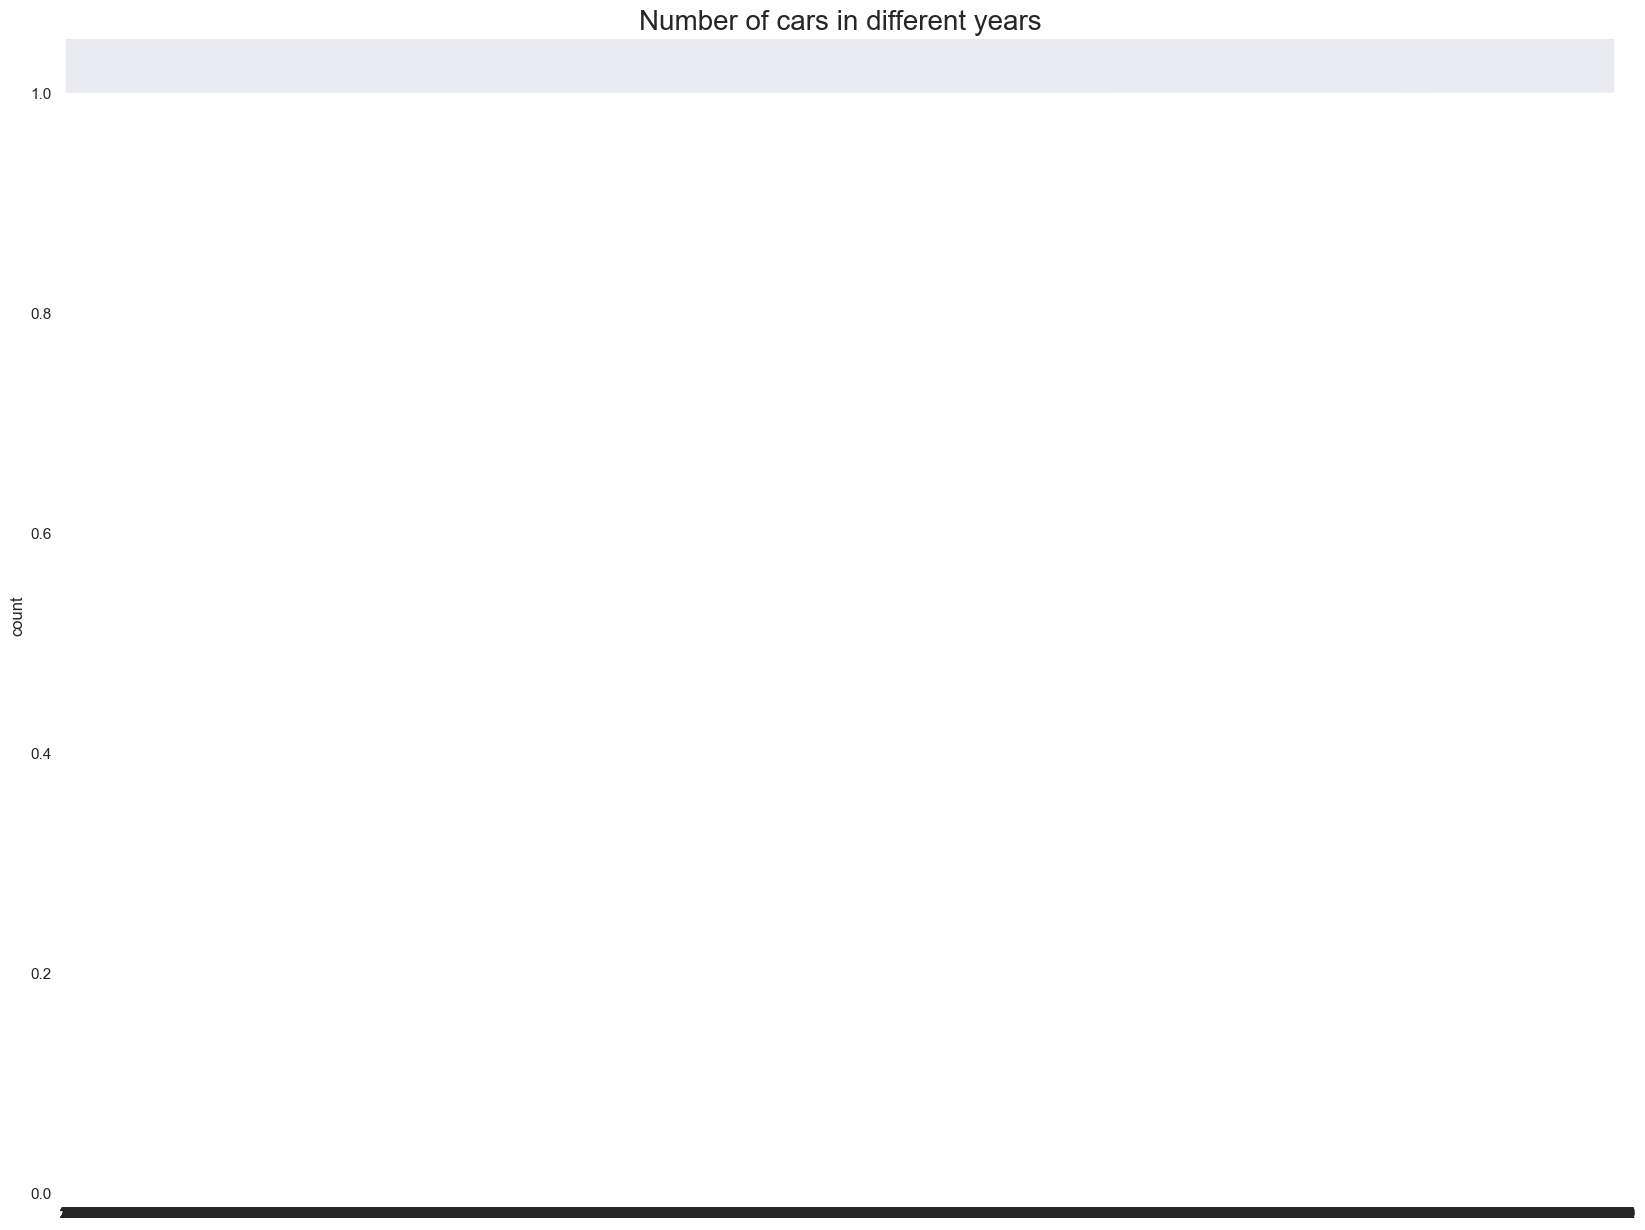

In [8]:
plt.figure(figsize = (20, 15))
sns.countplot(data.Year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

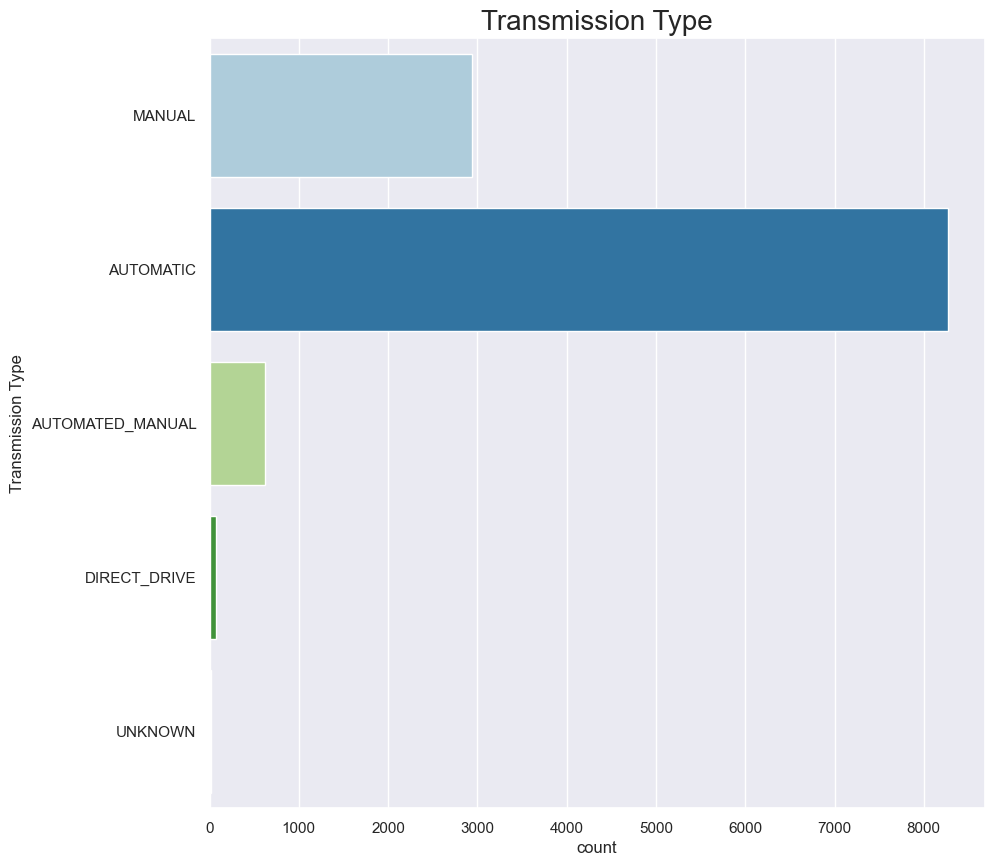

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

In [10]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [11]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


<Axes: xlabel='count', ylabel='Engine Fuel Type'>

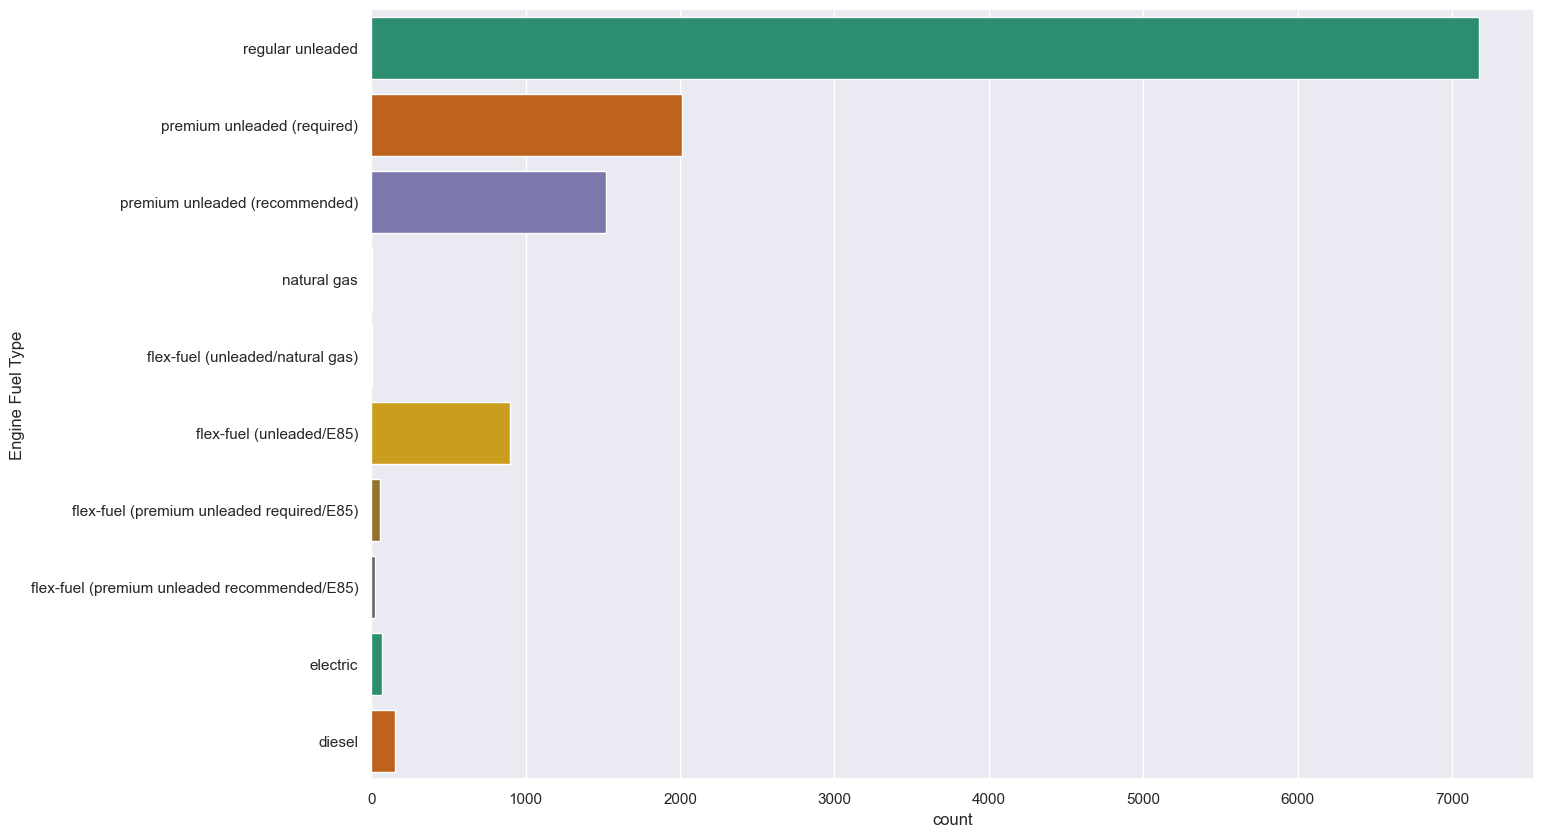

In [12]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

<Axes: xlabel='Vehicle Size', ylabel='count'>

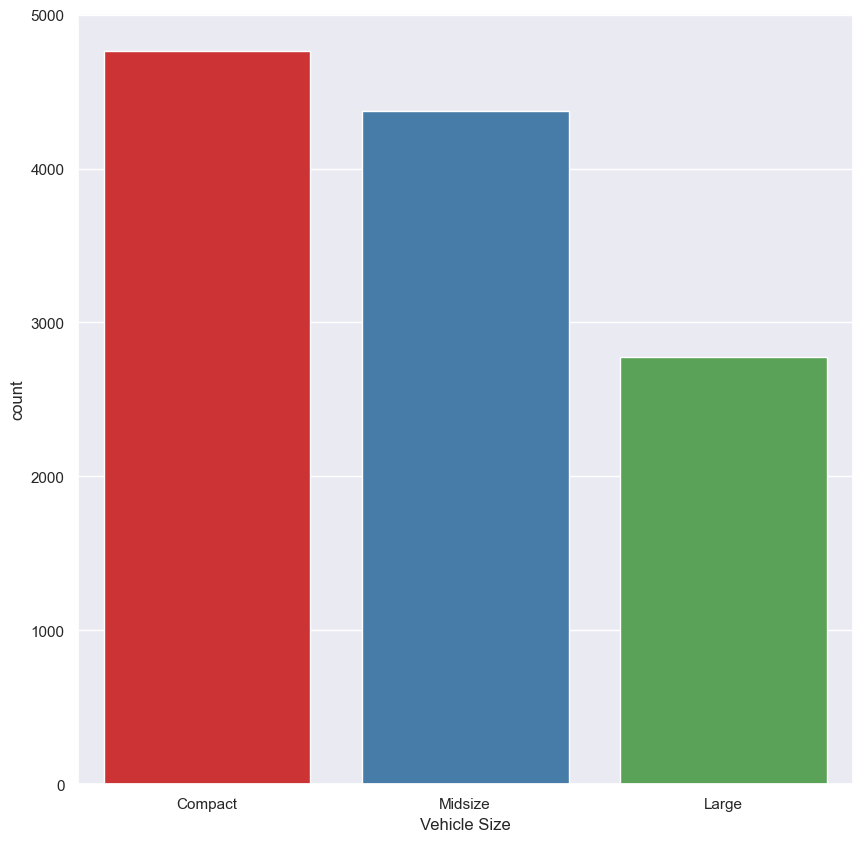

In [13]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

<Axes: >

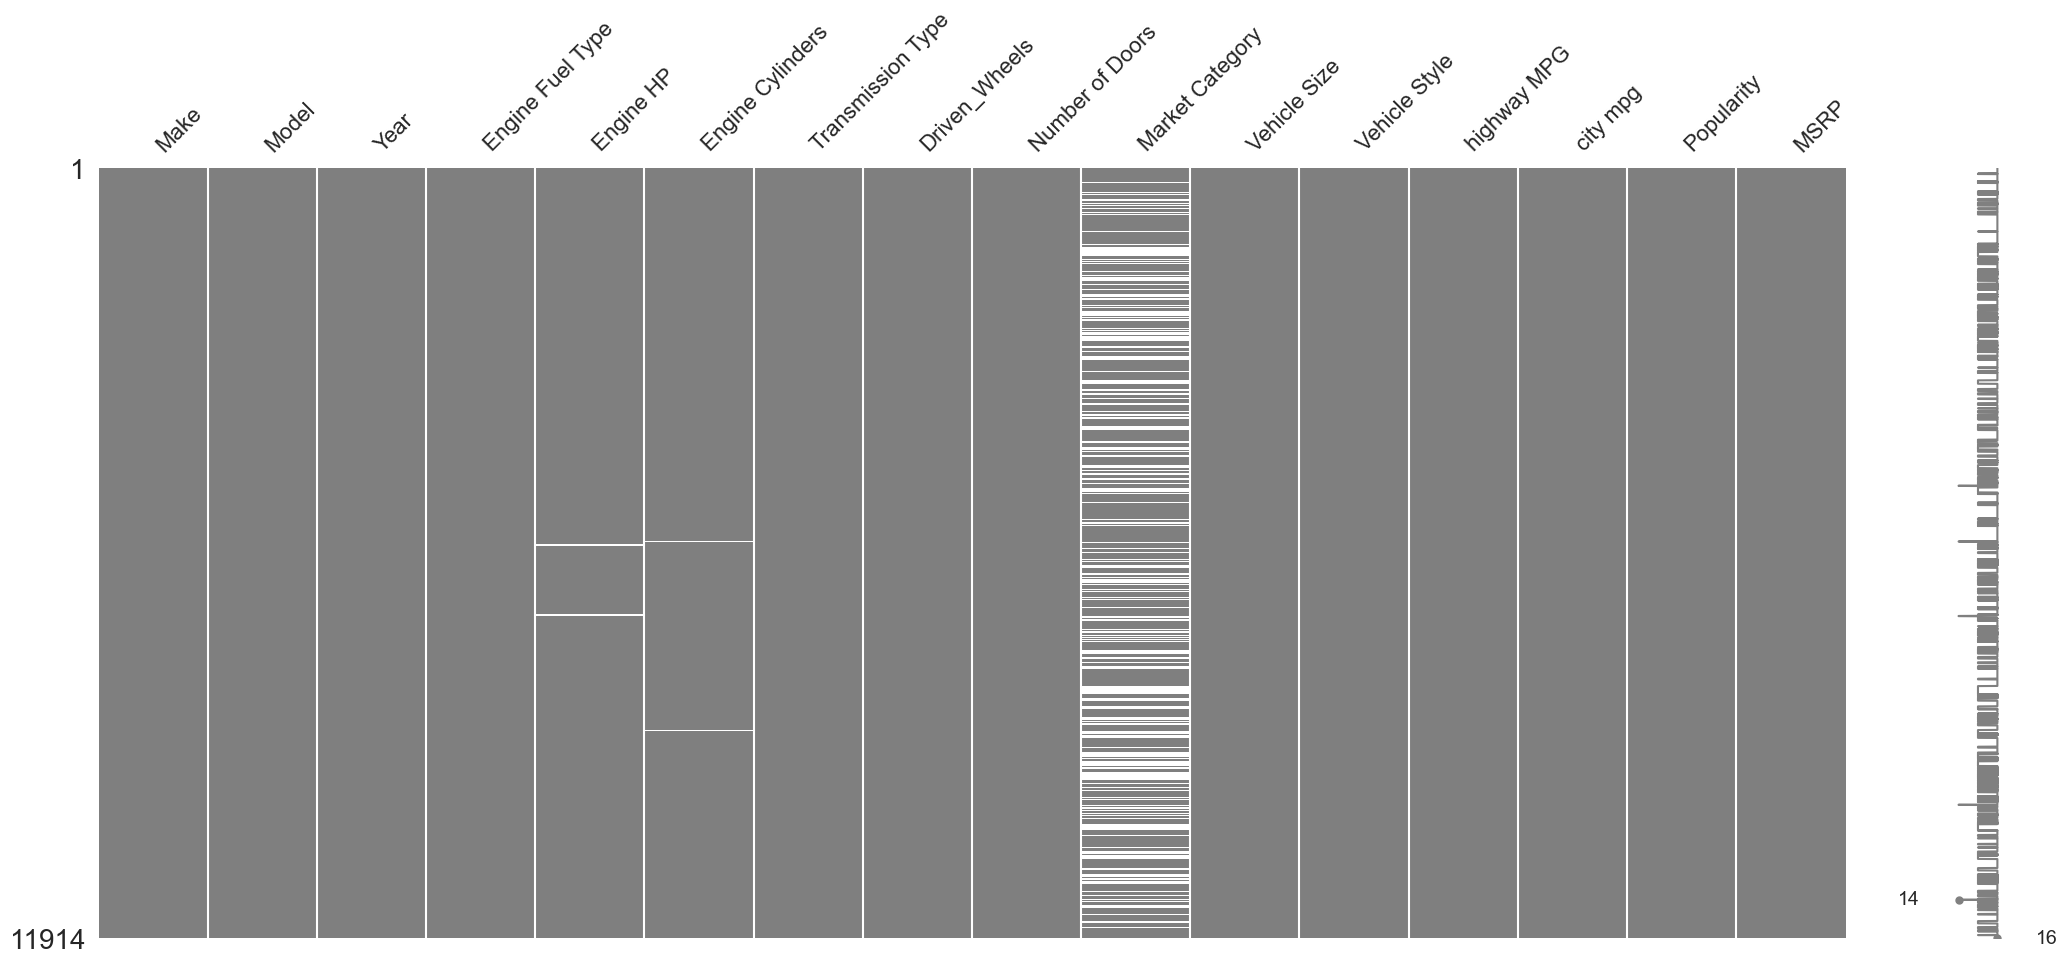

In [14]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

In [15]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

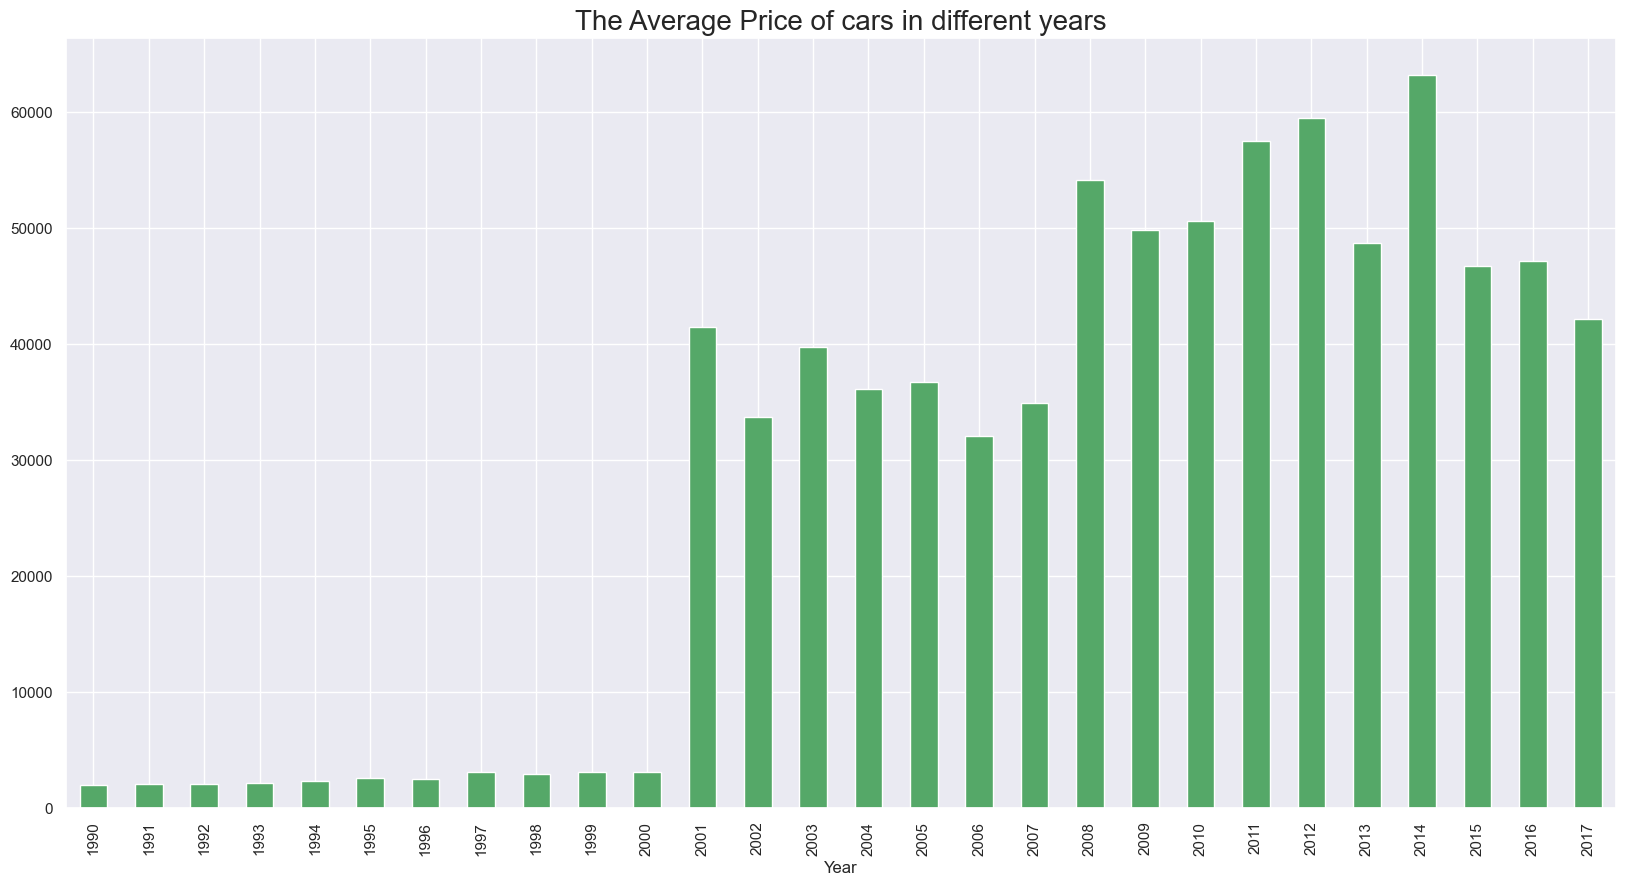

In [16]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


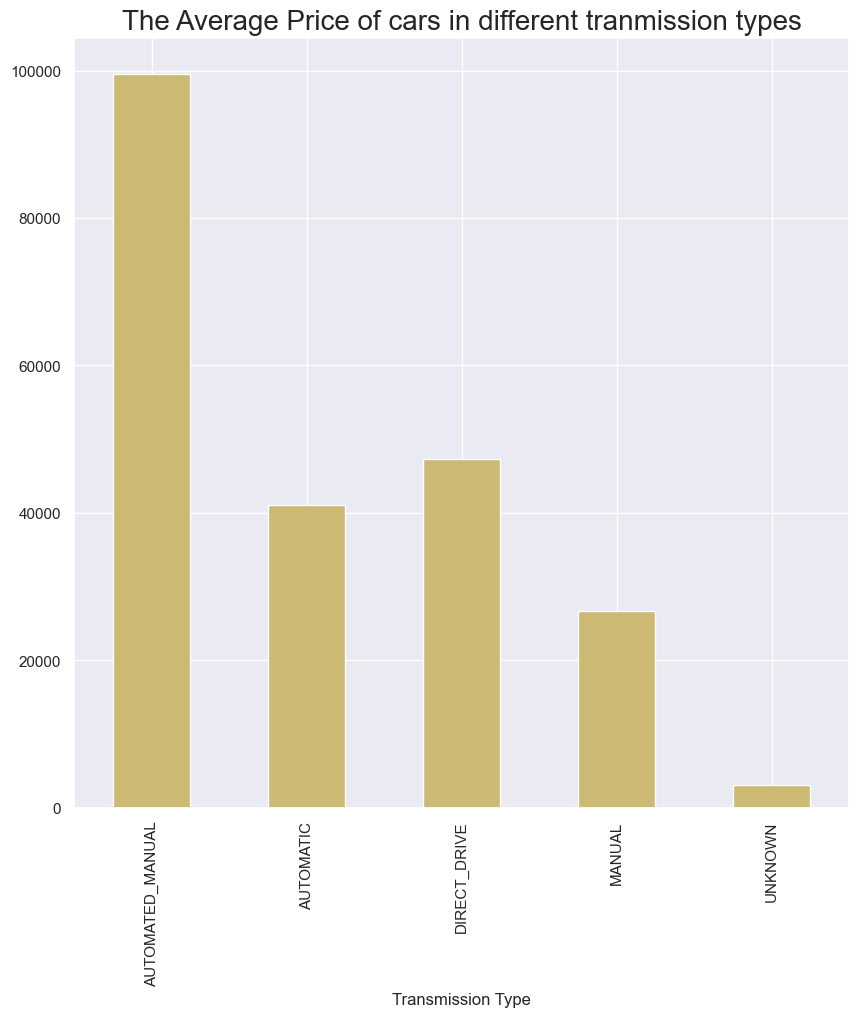

In [17]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()


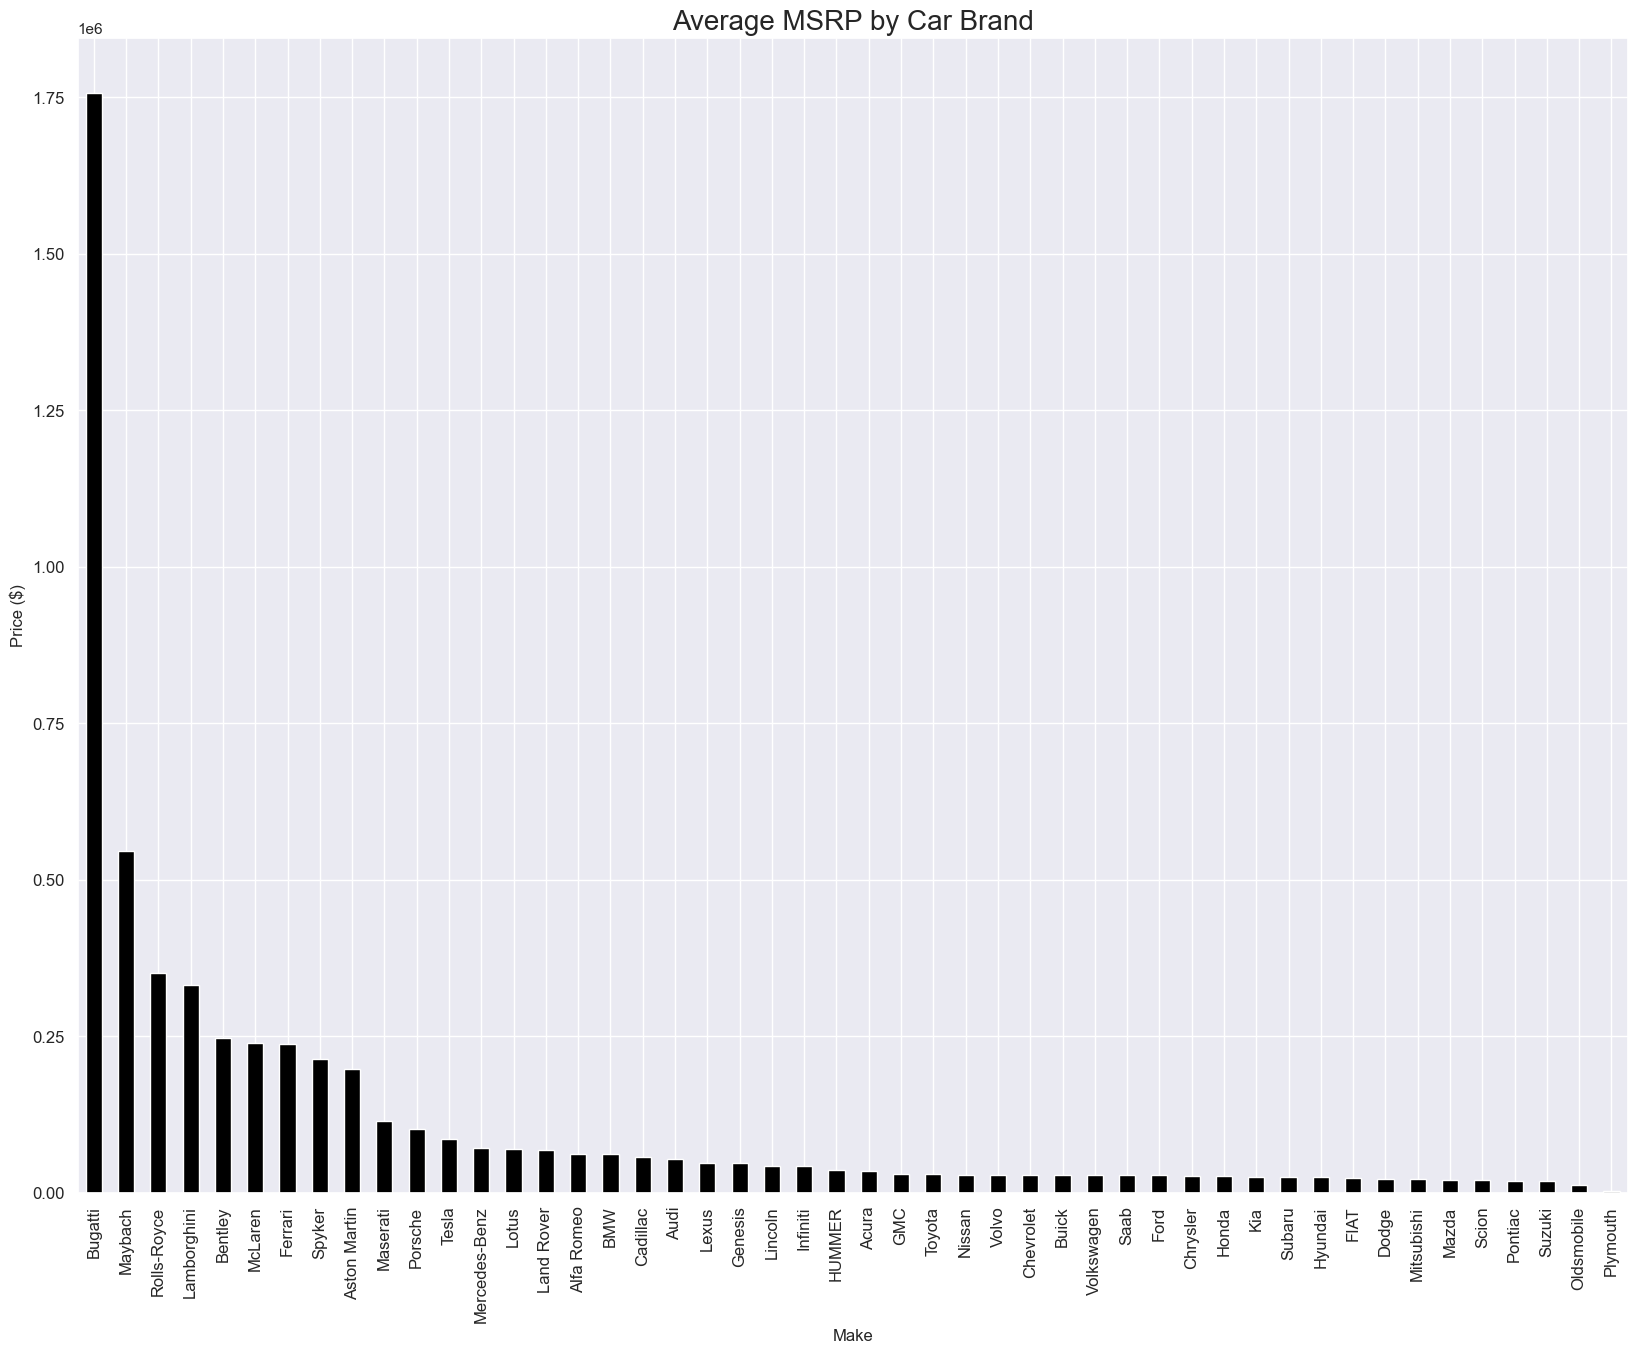

In [18]:
# Group by 'Make' and calculate the average MSRP only
avg_price_by_make = data.groupby('Make')['MSRP'].mean().sort_values(ascending=False)

# Plot it
plt.figure(figsize=(20, 15))
avg_price_by_make.plot(kind='bar', fontsize=12, color='black')
plt.title("Average MSRP by Car Brand", fontsize=20)
plt.ylabel("Price ($)")
plt.show()



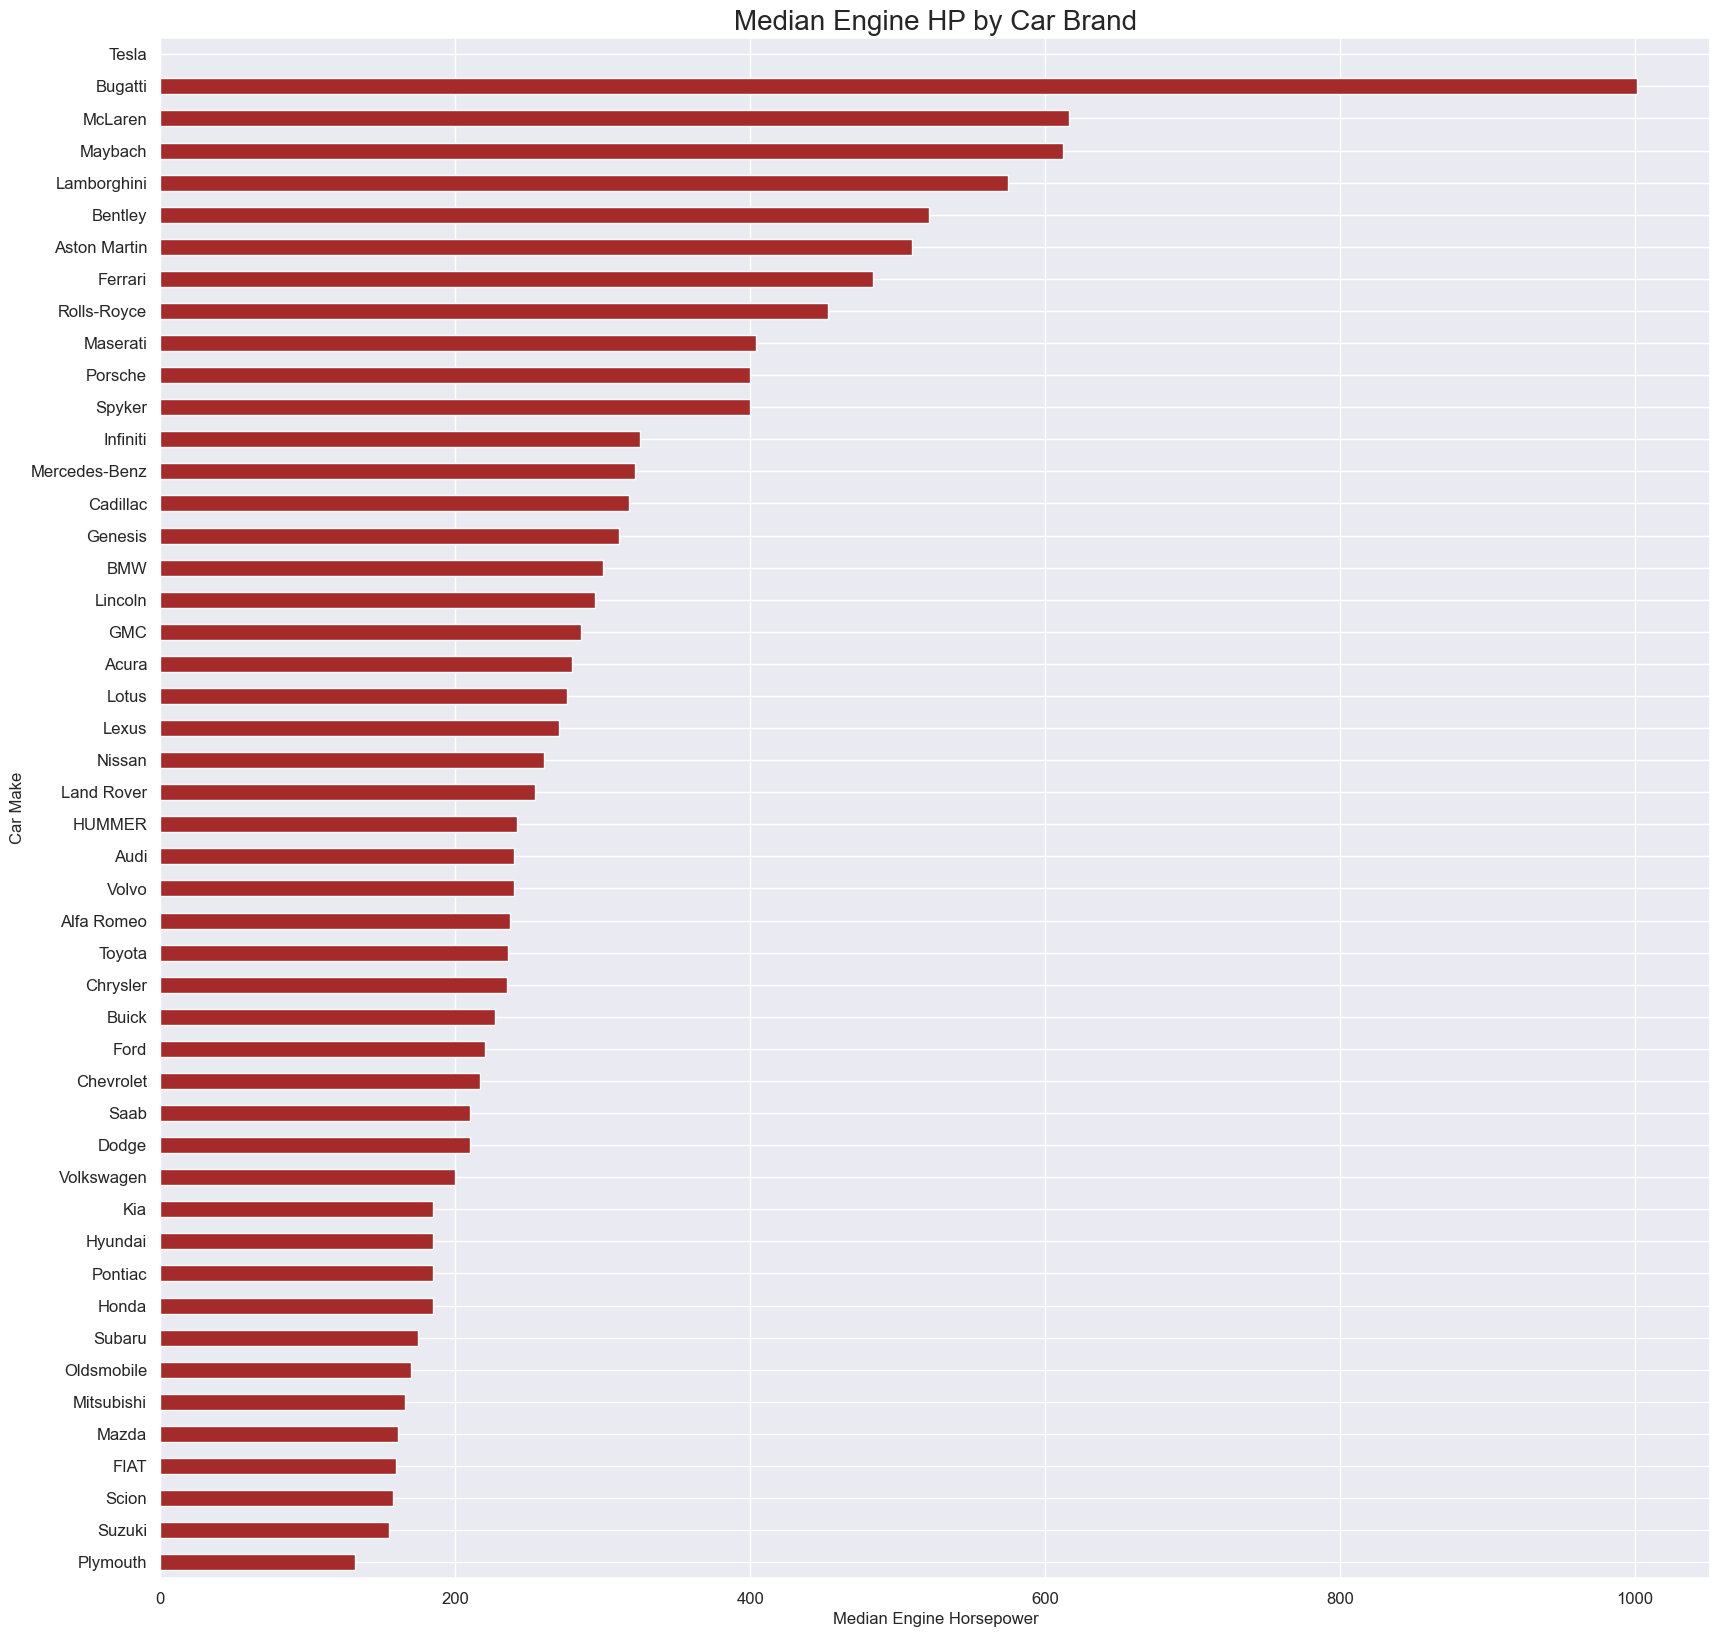

In [19]:
# Group by 'Make' and calculate the median of 'Engine HP' only
median_hp_by_make = data.groupby('Make')['Engine HP'].median().sort_values()

# Plot the result
plt.figure(figsize=(20, 20))
median_hp_by_make.plot(kind='barh', fontsize=12, color='brown')

# Add title and labels
plt.title("Median Engine HP by Car Brand", fontsize=20)
plt.xlabel("Median Engine Horsepower")
plt.ylabel("Car Make")
plt.grid(True)

# Show the plot
plt.show()

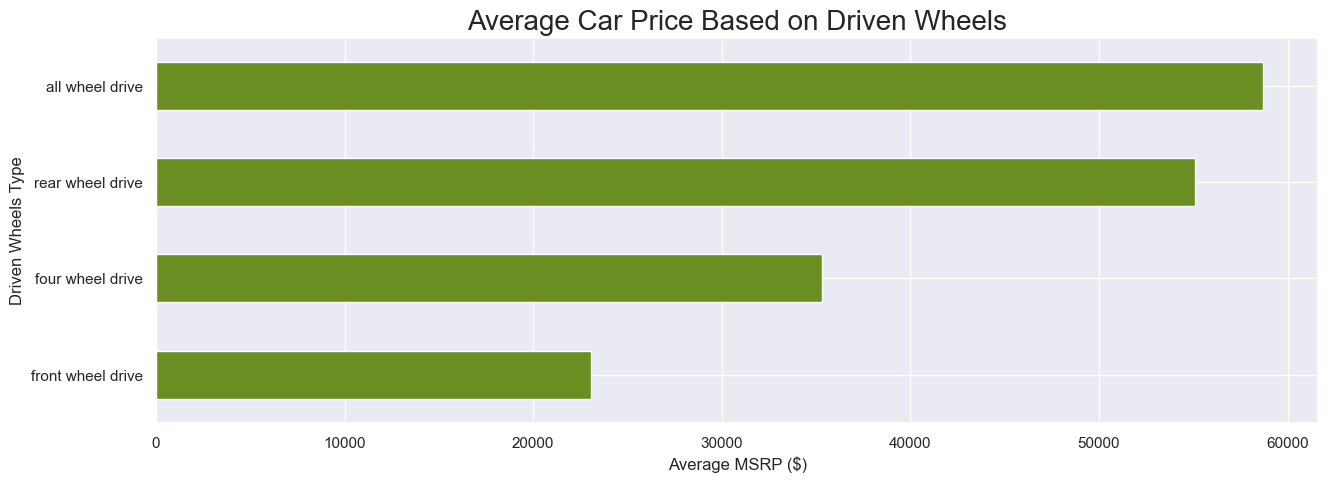

In [20]:
# Group only by 'Driven_Wheels' and compute the average MSRP column safely
avg_price_by_drive = data.groupby('Driven_Wheels')['MSRP'].mean().sort_values()

# Plot the average price based on driven wheels
plt.figure(figsize=(15, 5))
avg_price_by_drive.plot(kind='barh', color='olivedrab')
plt.title("Average Car Price Based on Driven Wheels", fontsize=20)
plt.xlabel("Average MSRP ($)")
plt.ylabel("Driven Wheels Type")
plt.grid(True)
plt.show()


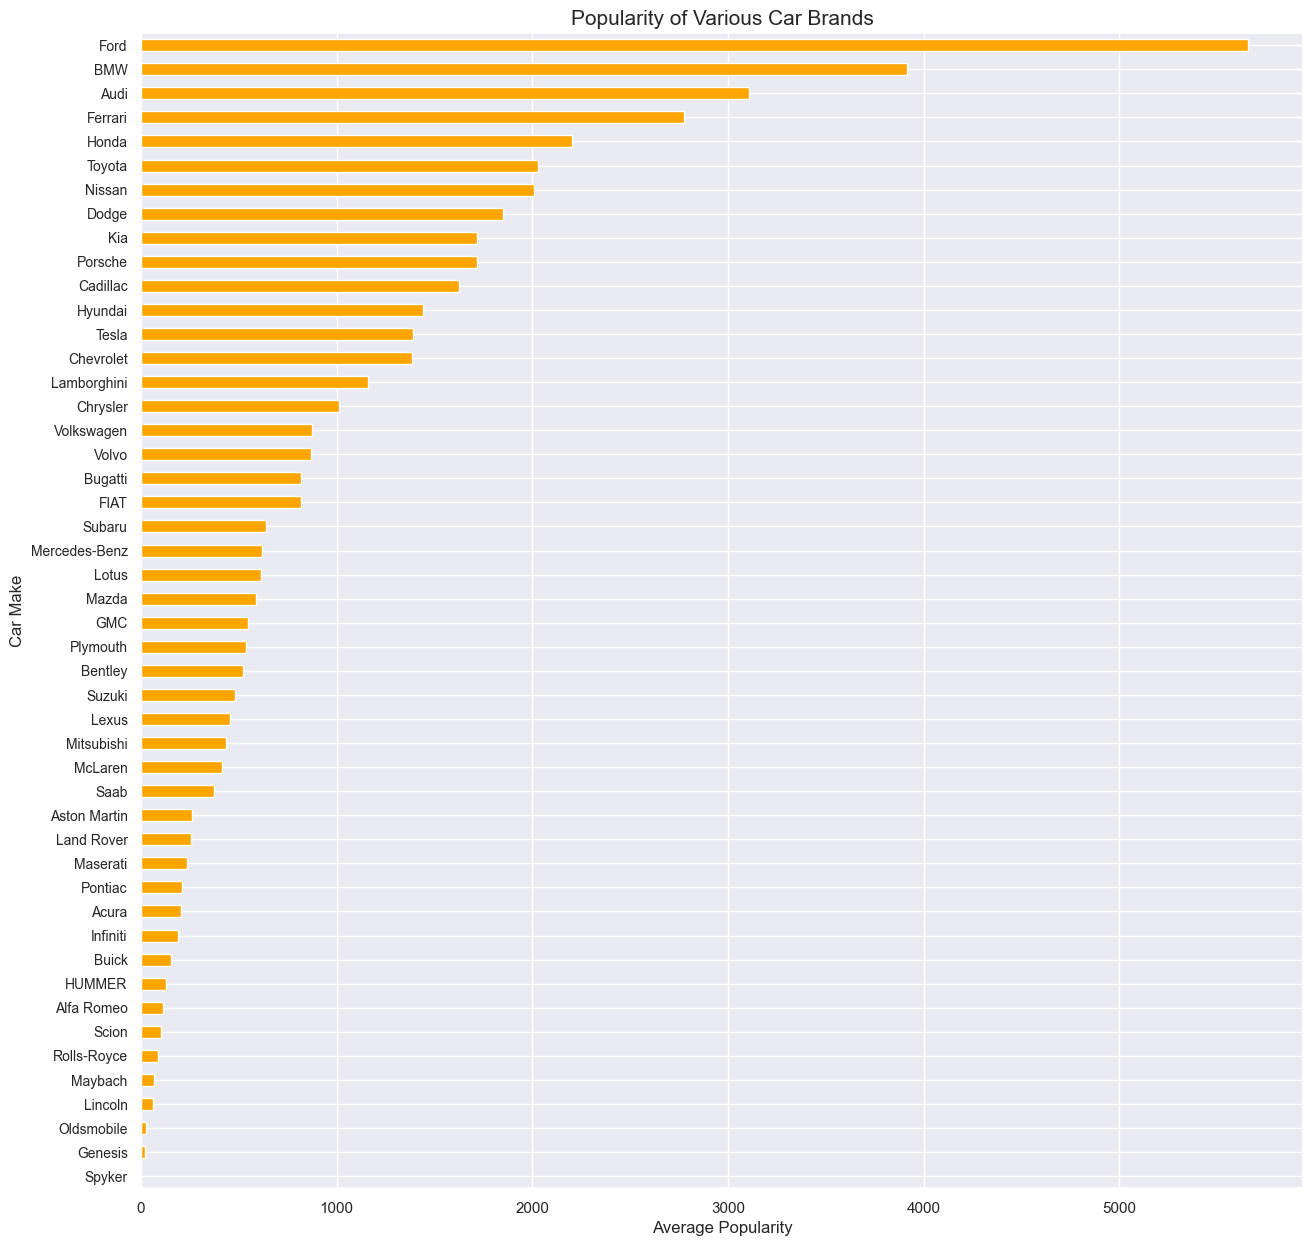

In [21]:
# Group by 'Make' and calculate the average Popularity only
popularity_by_make = data.groupby('Make')['Popularity'].mean().sort_values(ascending=True)

# Plot the average popularity of each brand
plt.figure(figsize=(15, 15))
popularity_by_make.plot(kind='barh', color='orange')

# Add styling
plt.title("Popularity of Various Car Brands", fontsize=15)
plt.xlabel("Average Popularity")
plt.ylabel("Car Make")
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


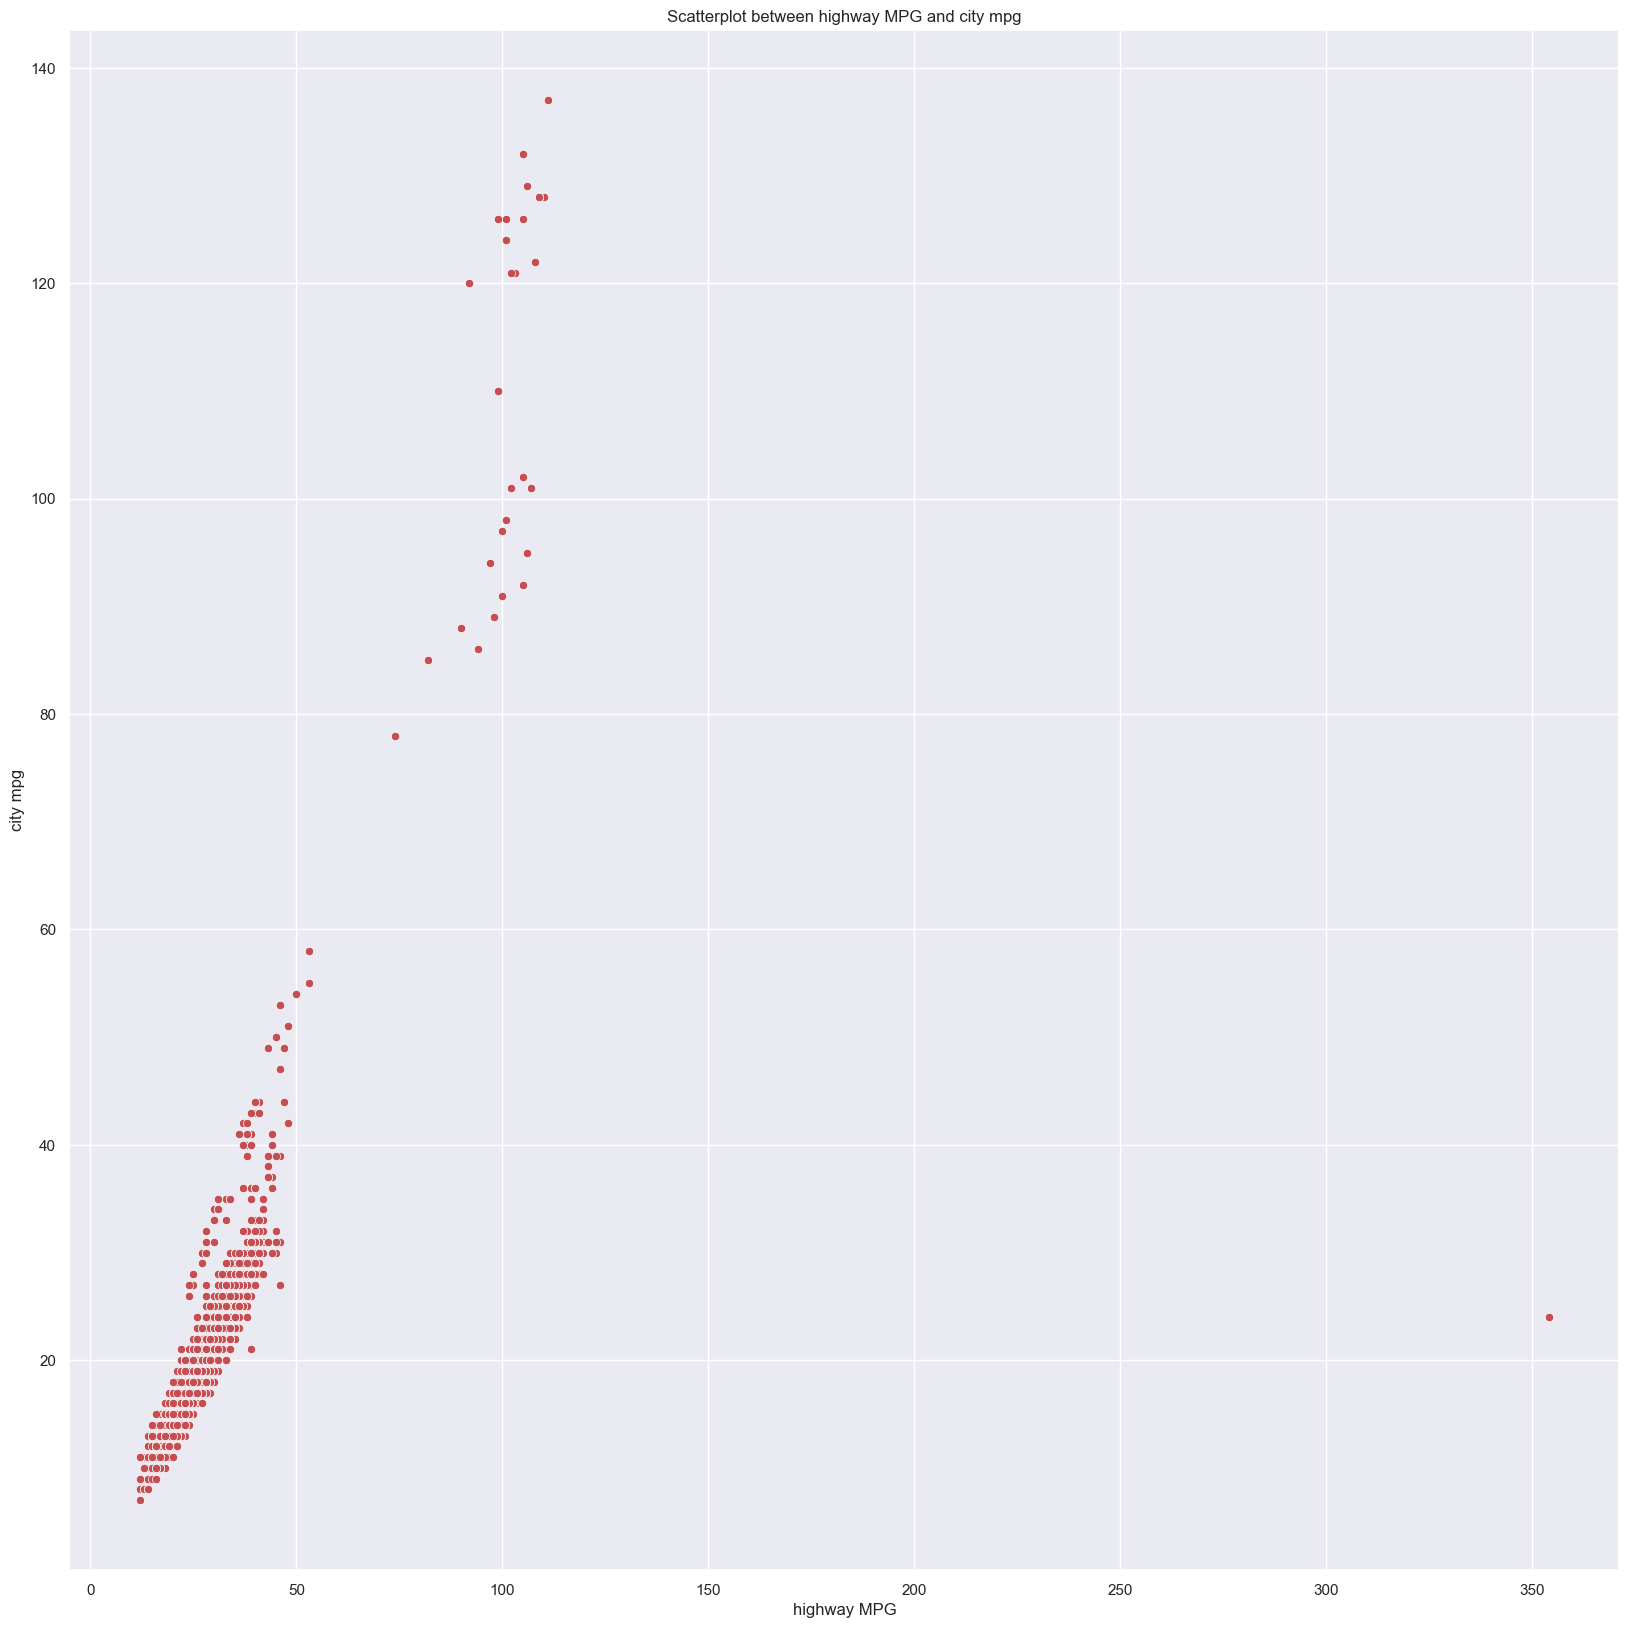

In [22]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [23]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [24]:
data = data[data['highway MPG'] < 350]

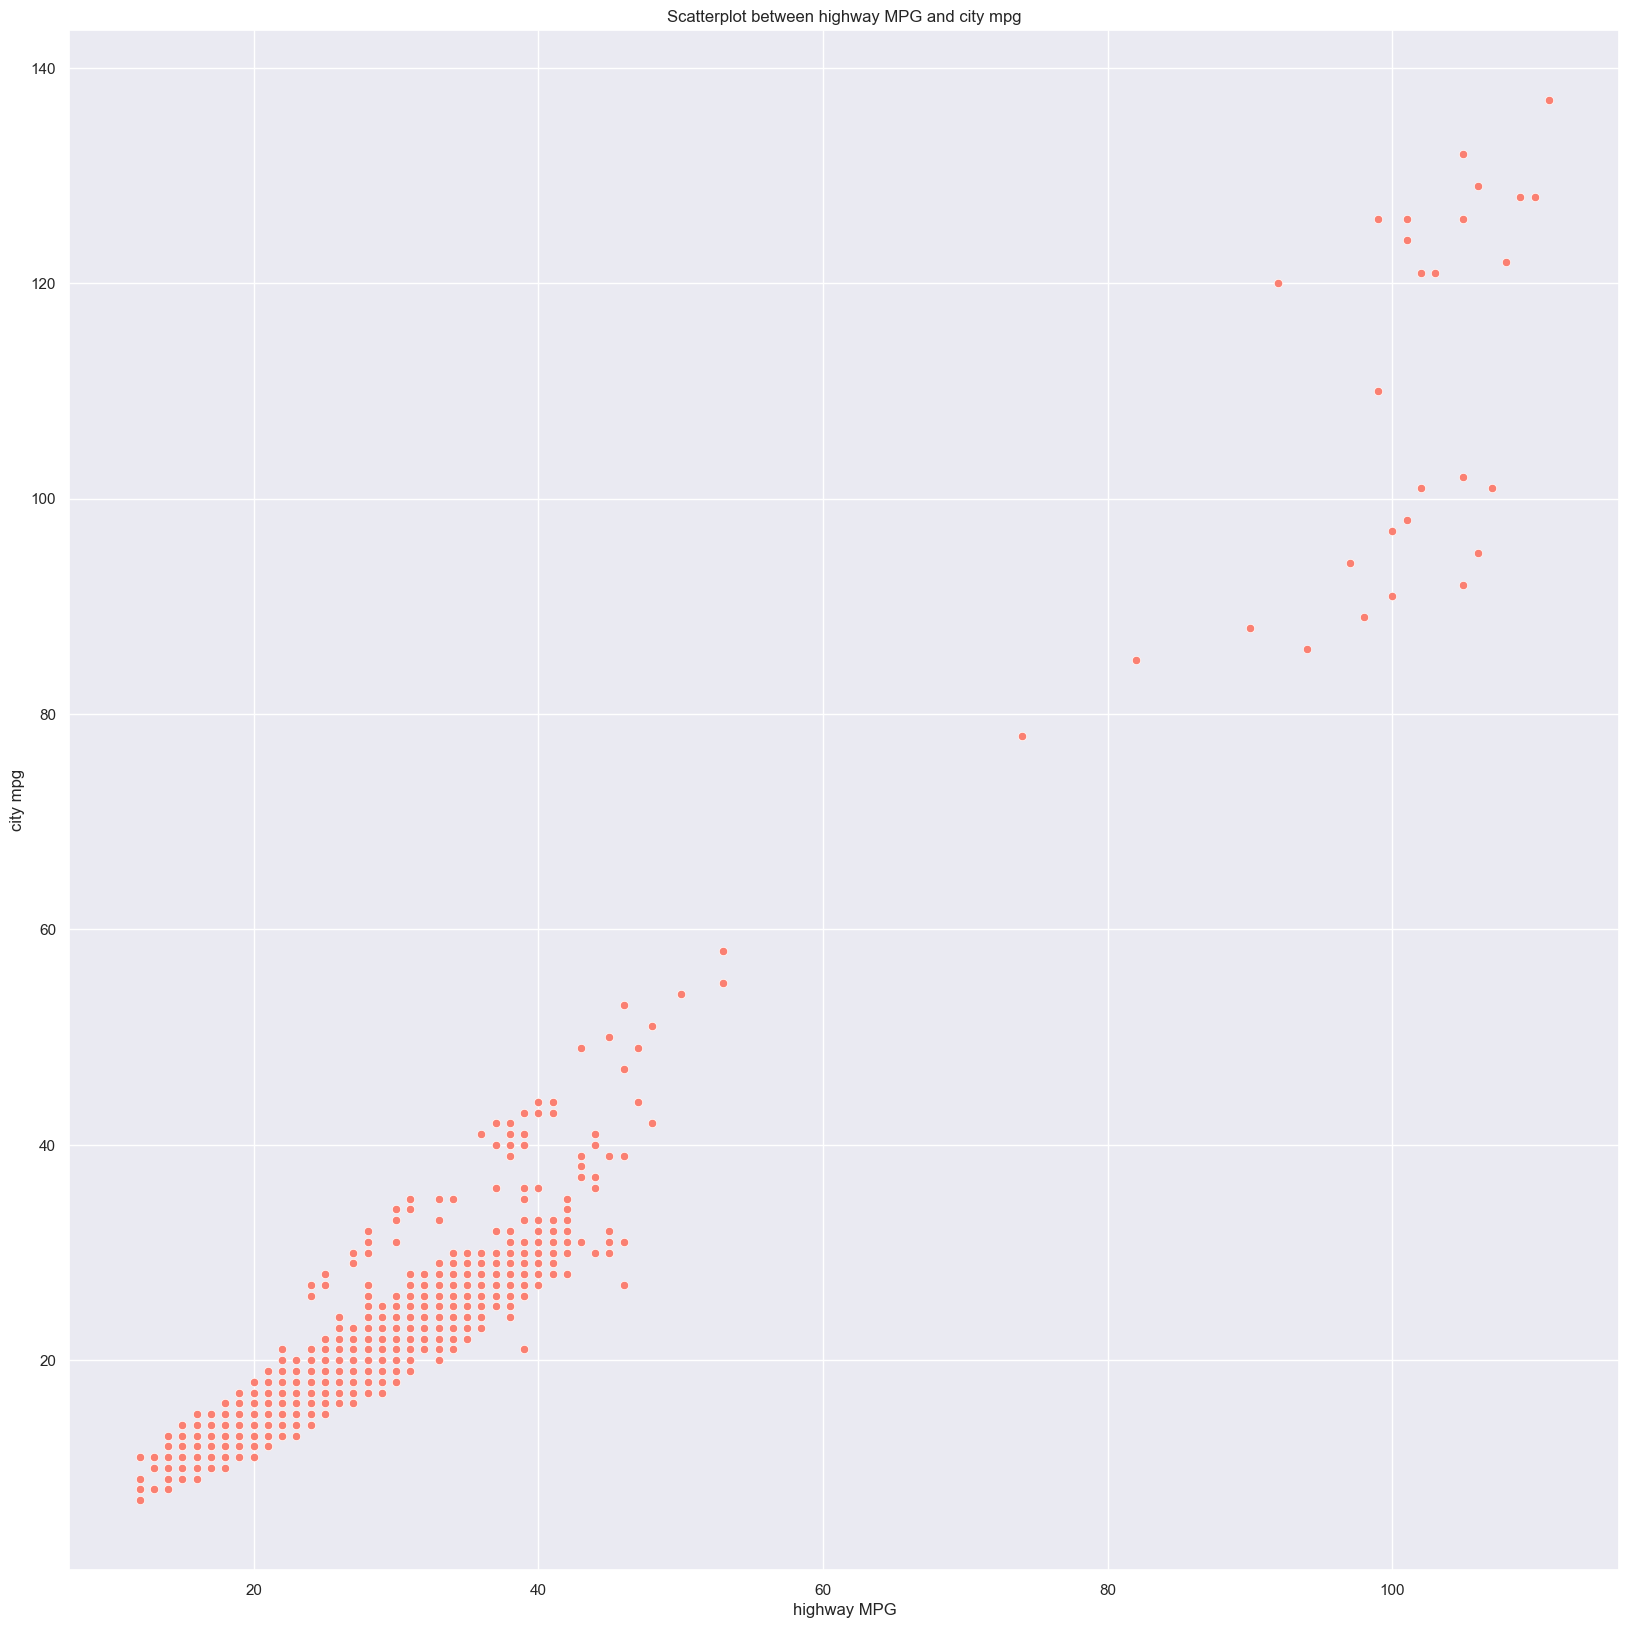

In [25]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [26]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

<Axes: xlabel='highway MPG'>

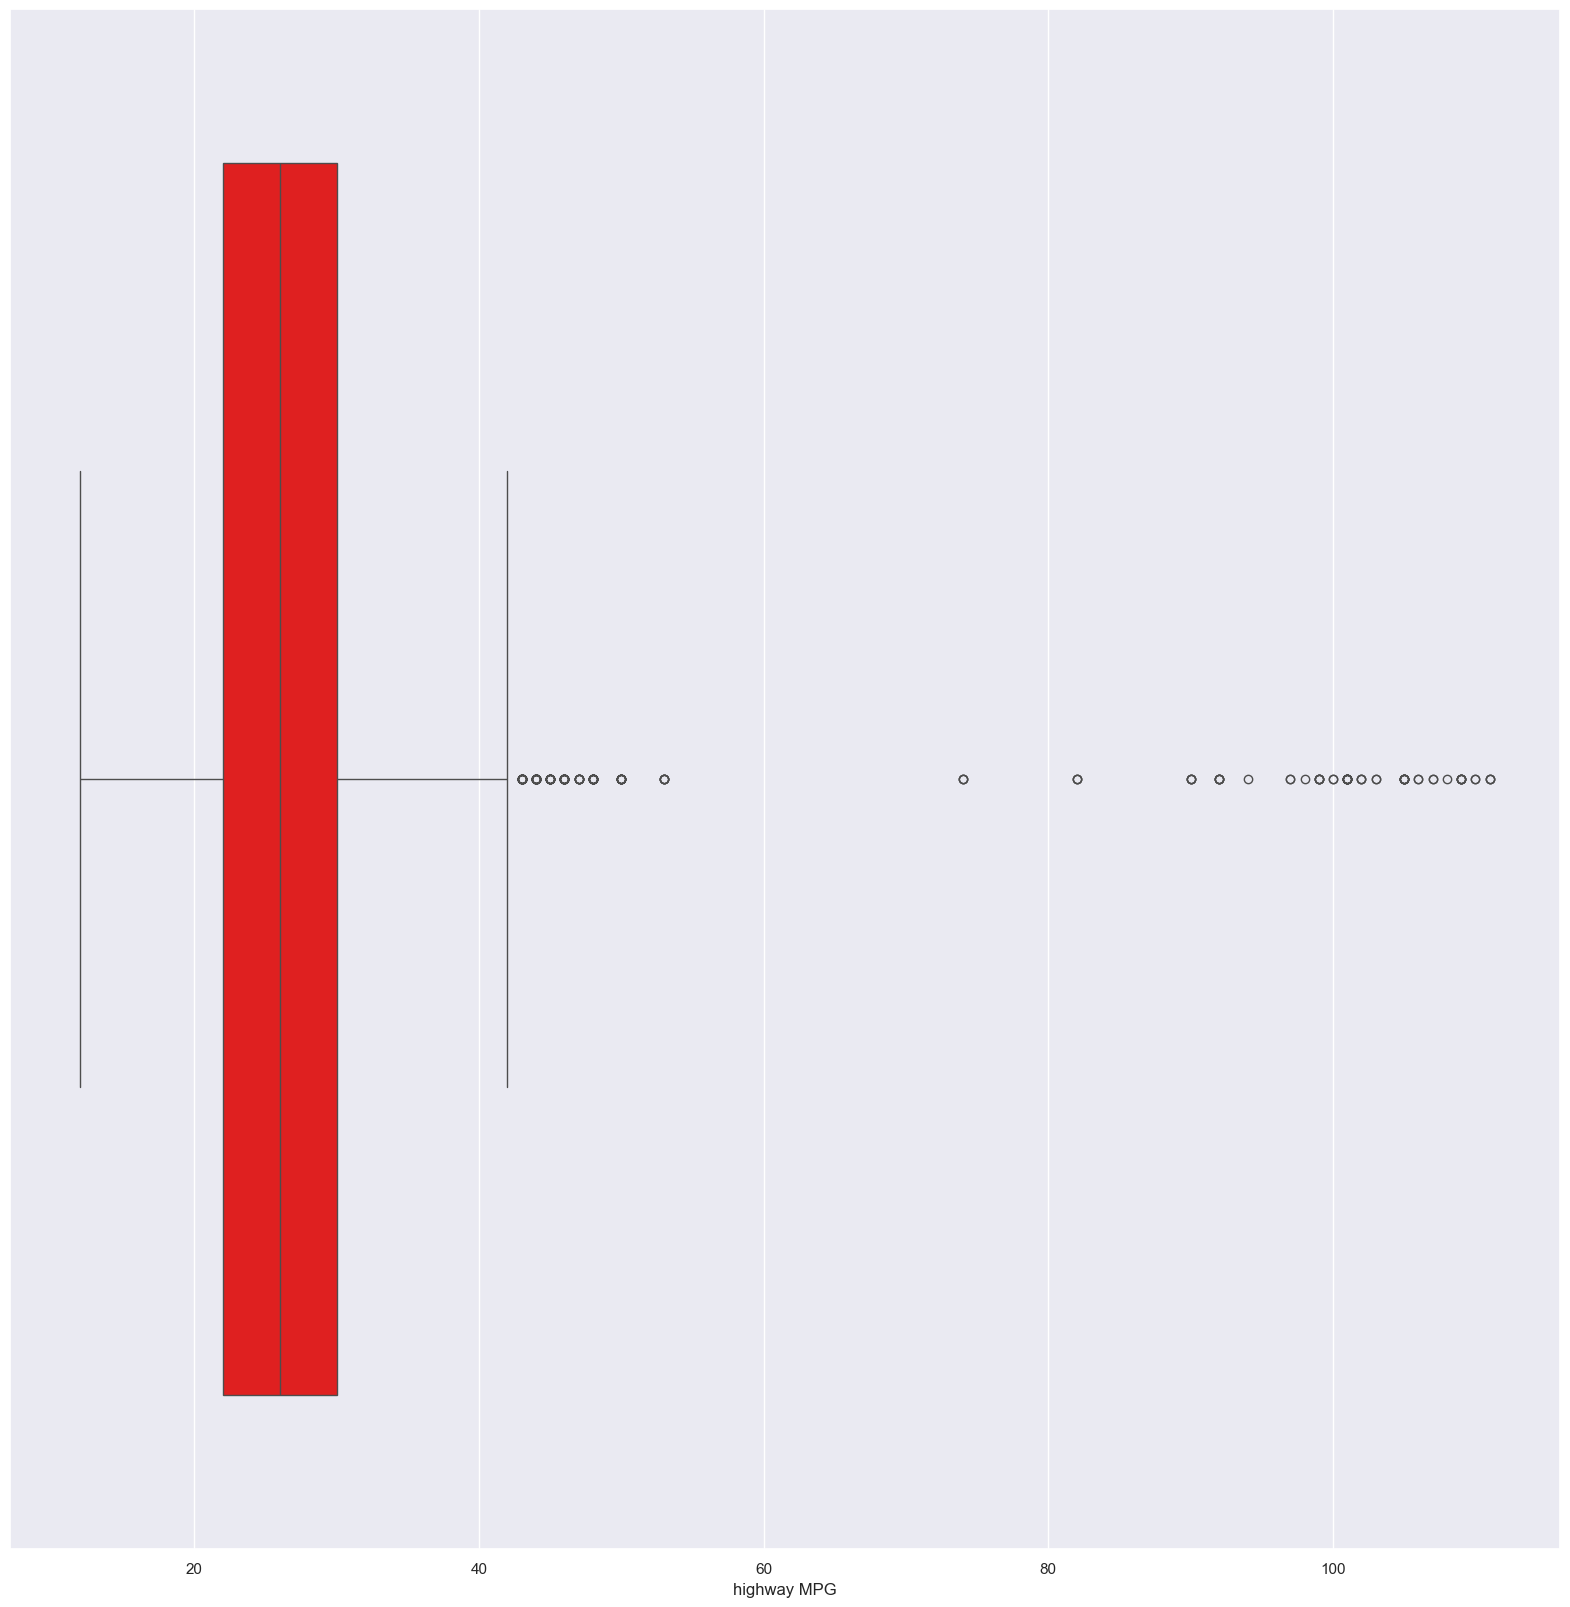

In [27]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

In [28]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [29]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [30]:
data = data[data['highway MPG'] < 60]

<Axes: xlabel='highway MPG'>

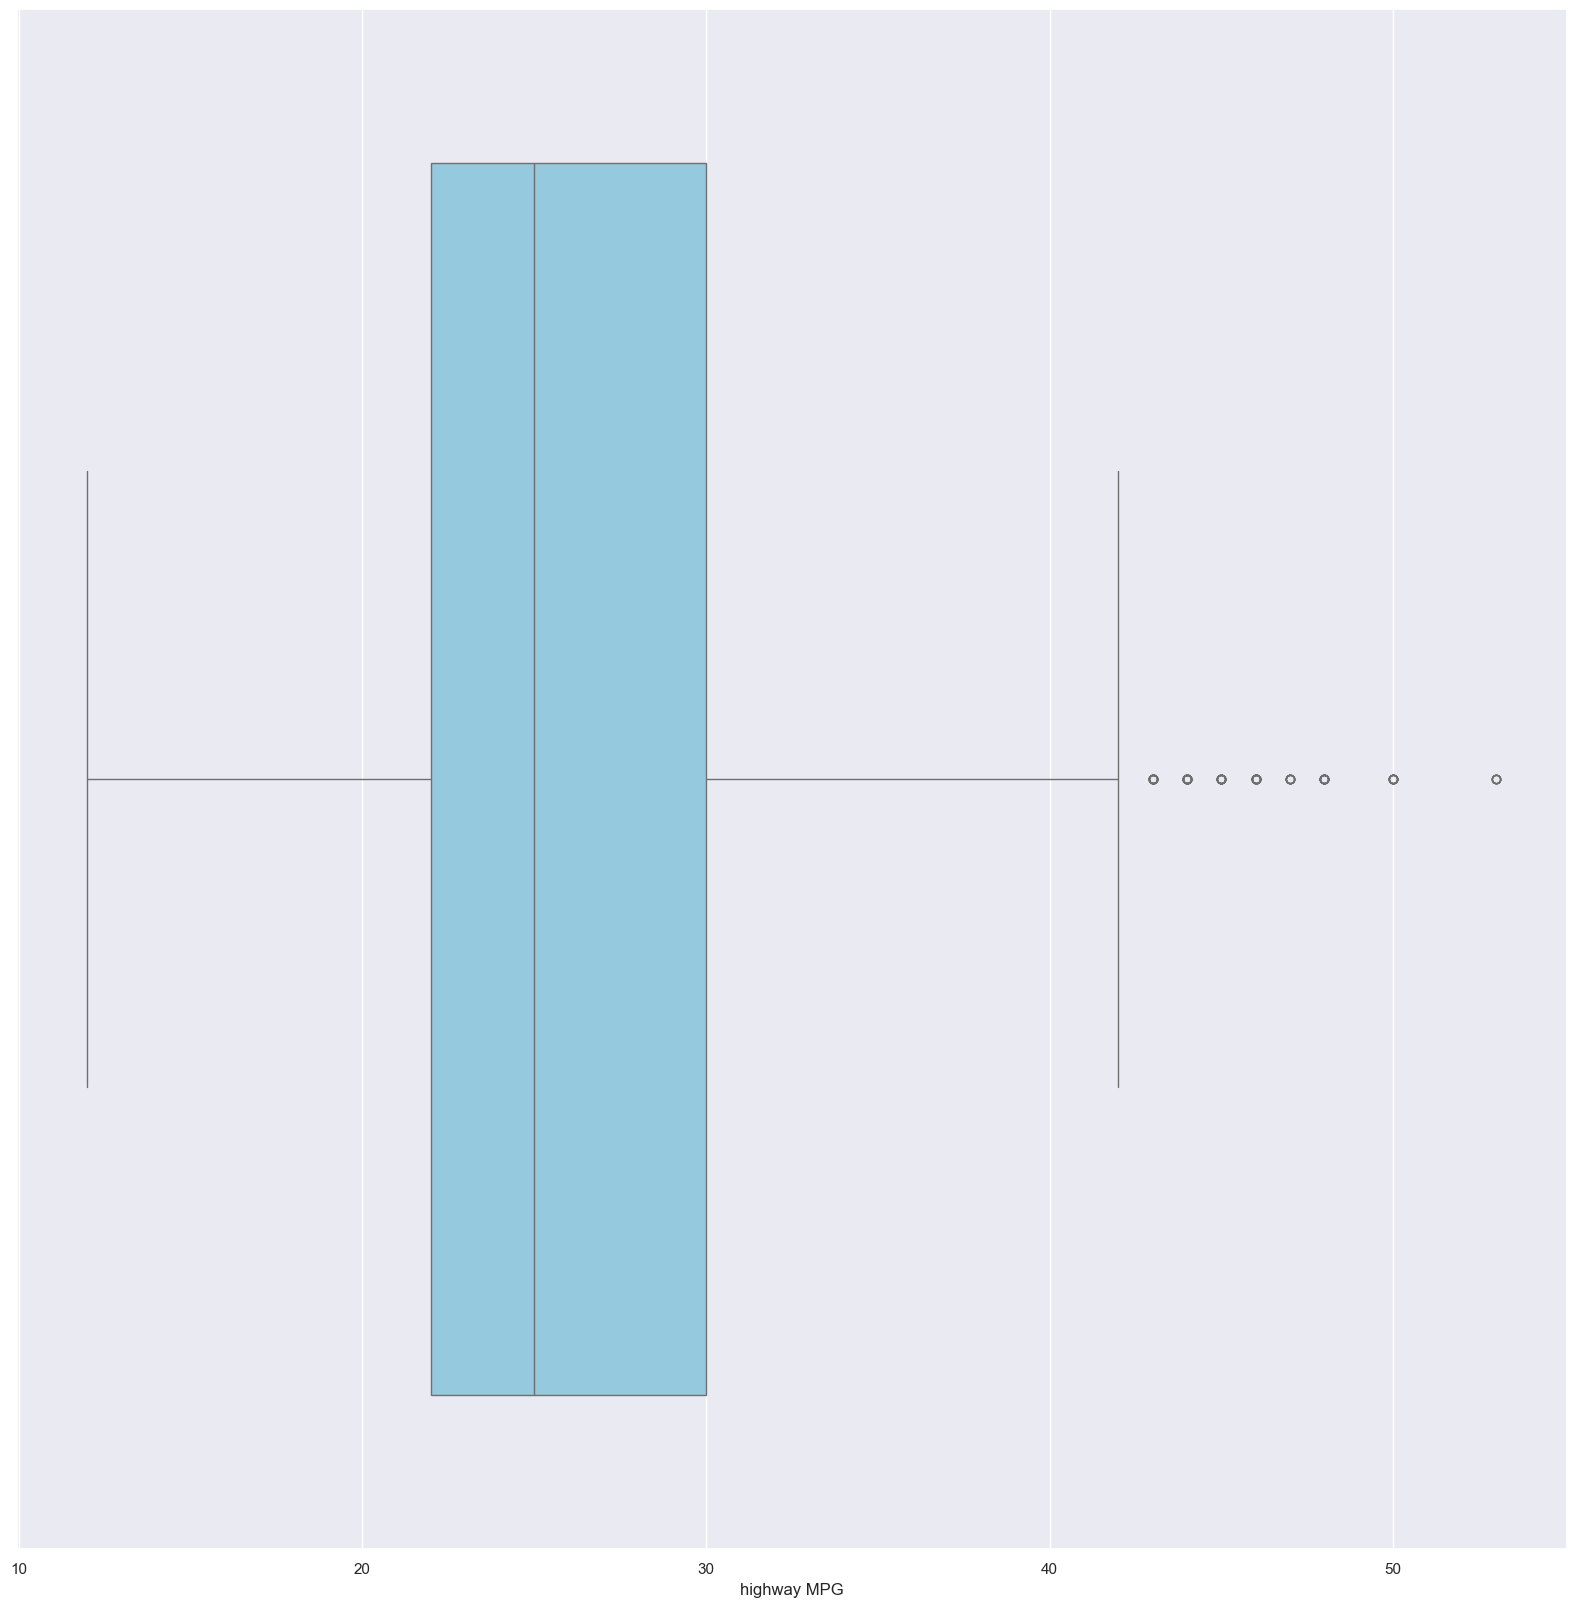

In [31]:
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')

<Axes: xlabel='city mpg'>

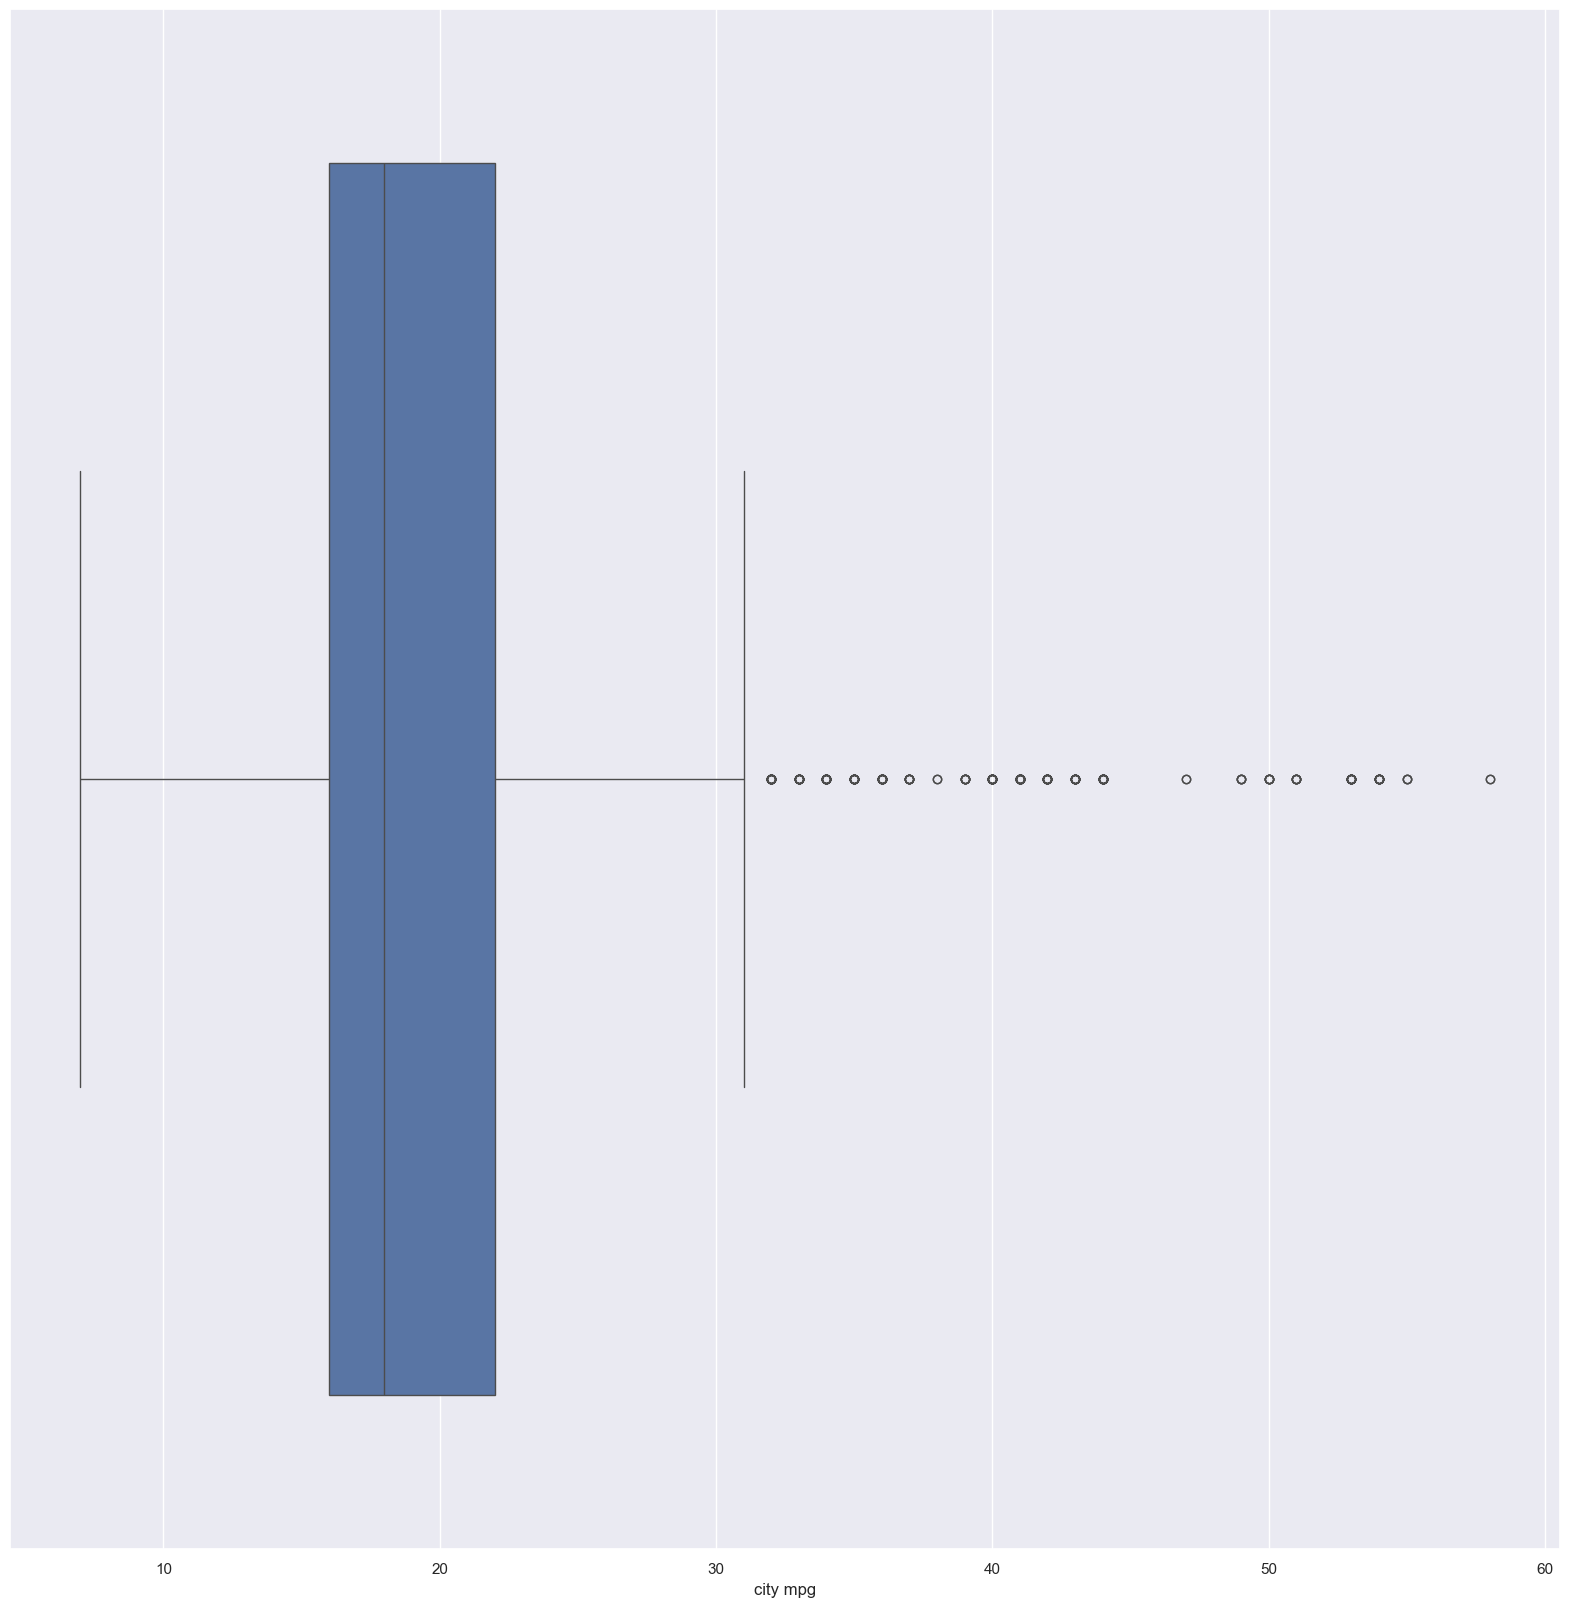

In [32]:
sns.boxplot(x = 'city mpg', data = data)

In [33]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


In [34]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


In [35]:
data = data[data['city mpg'] < 40]

<Axes: xlabel='city mpg'>

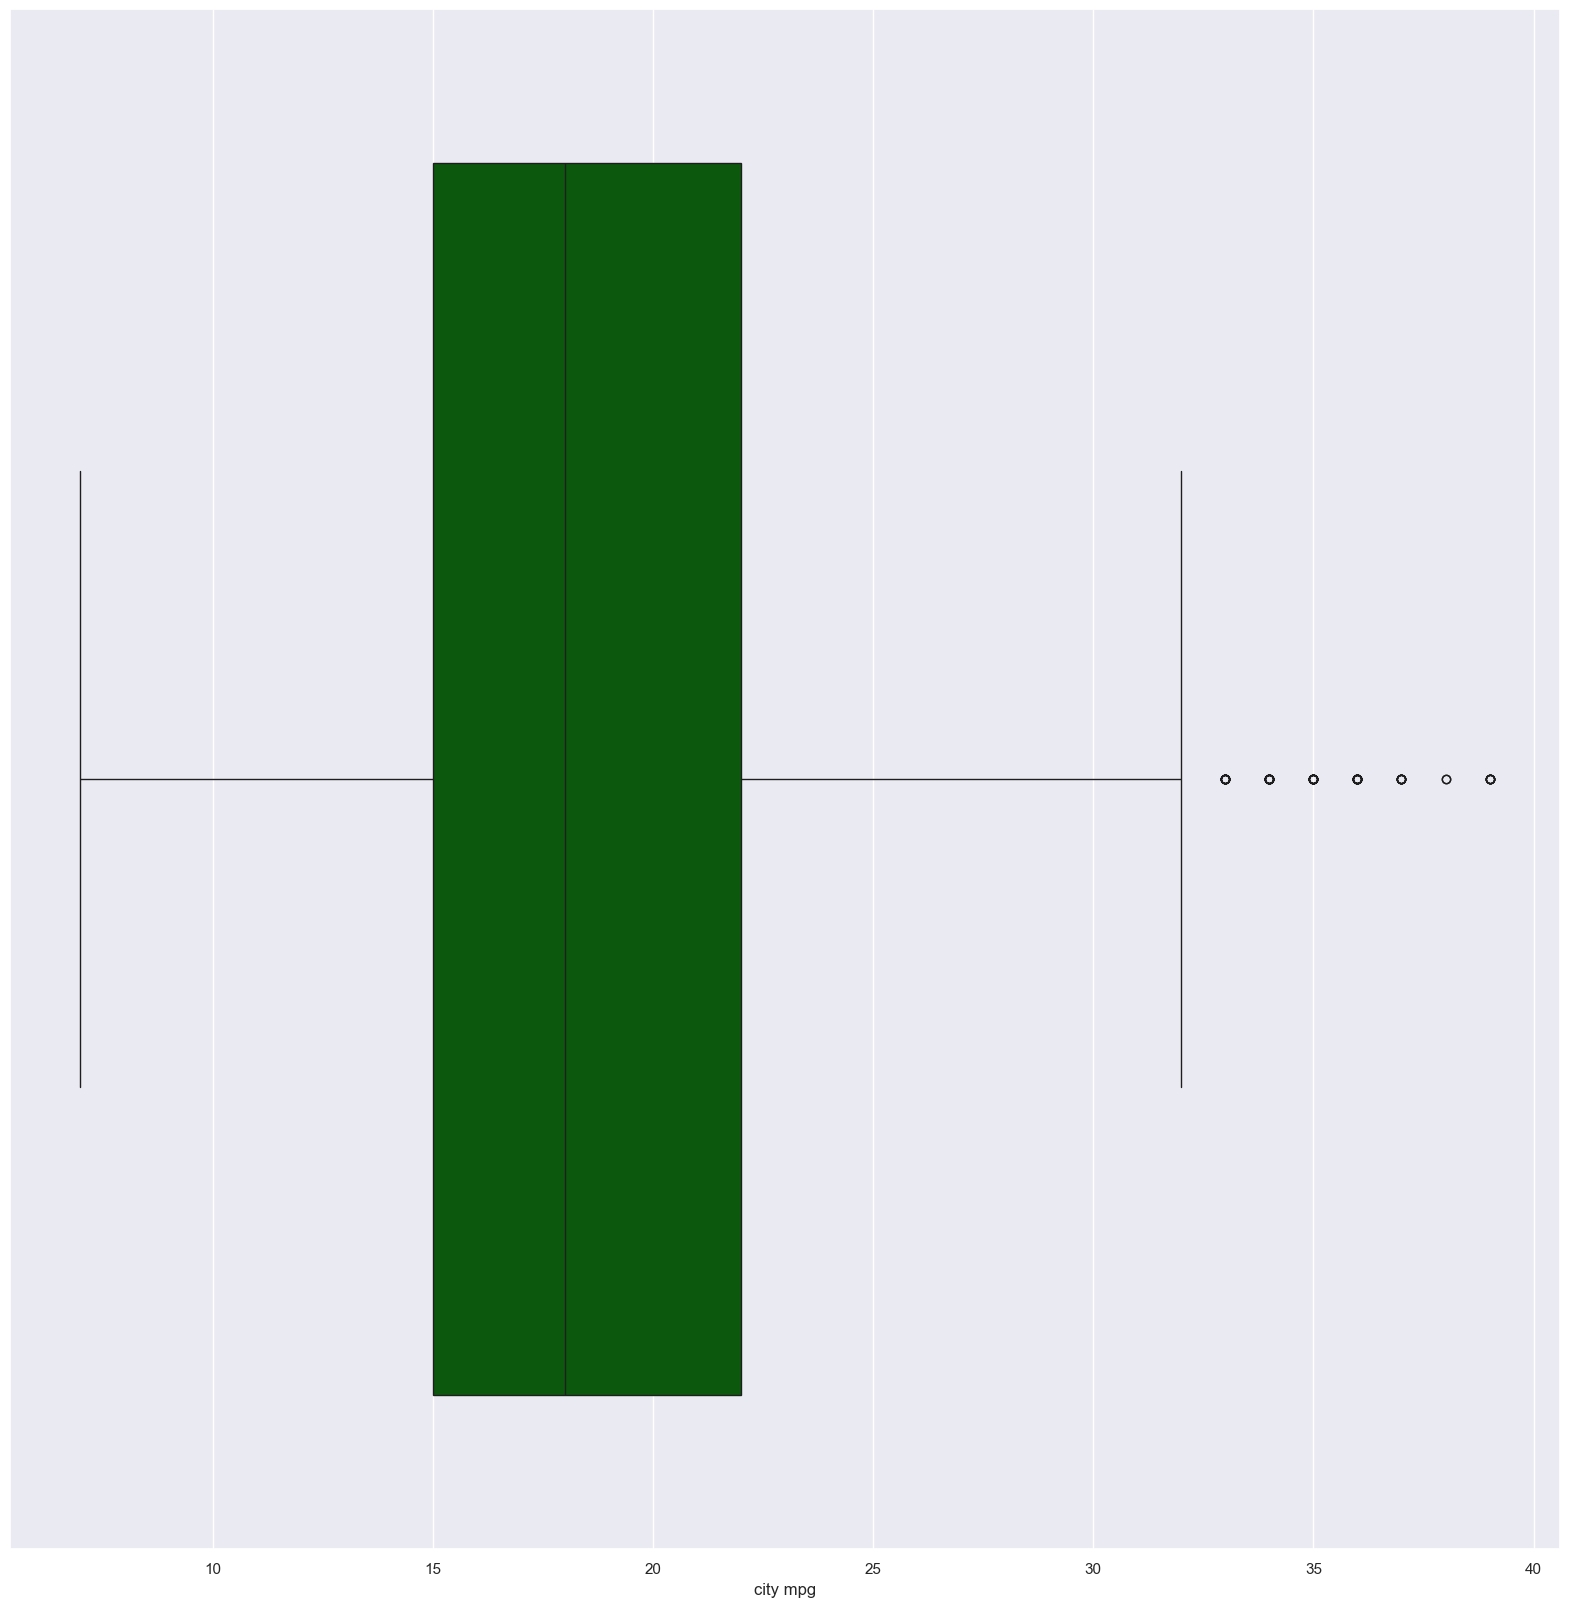

In [36]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

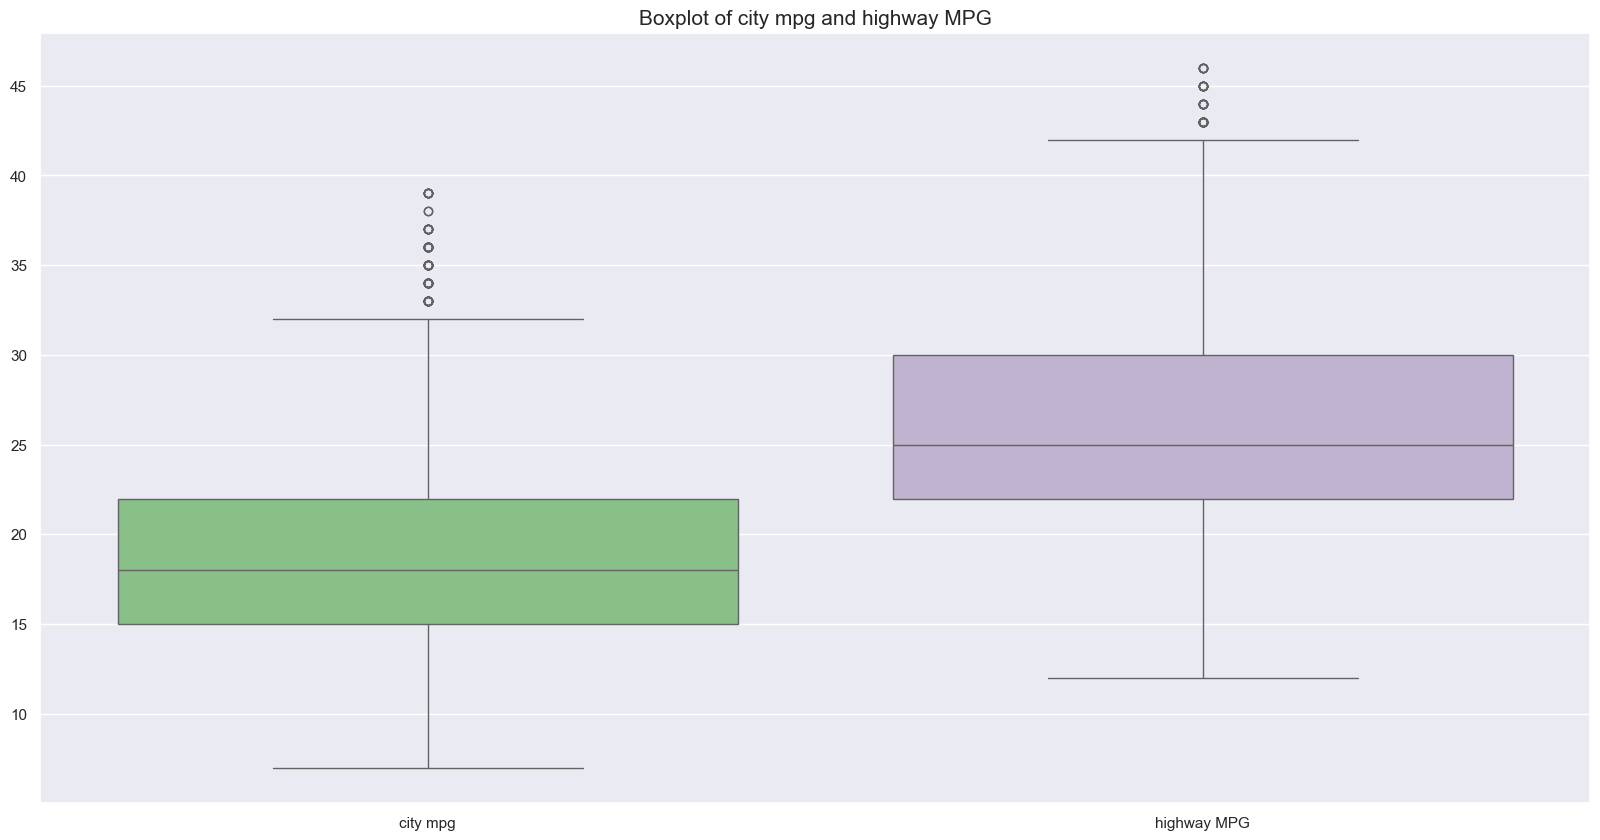

In [37]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

<Axes: ylabel='Engine HP'>

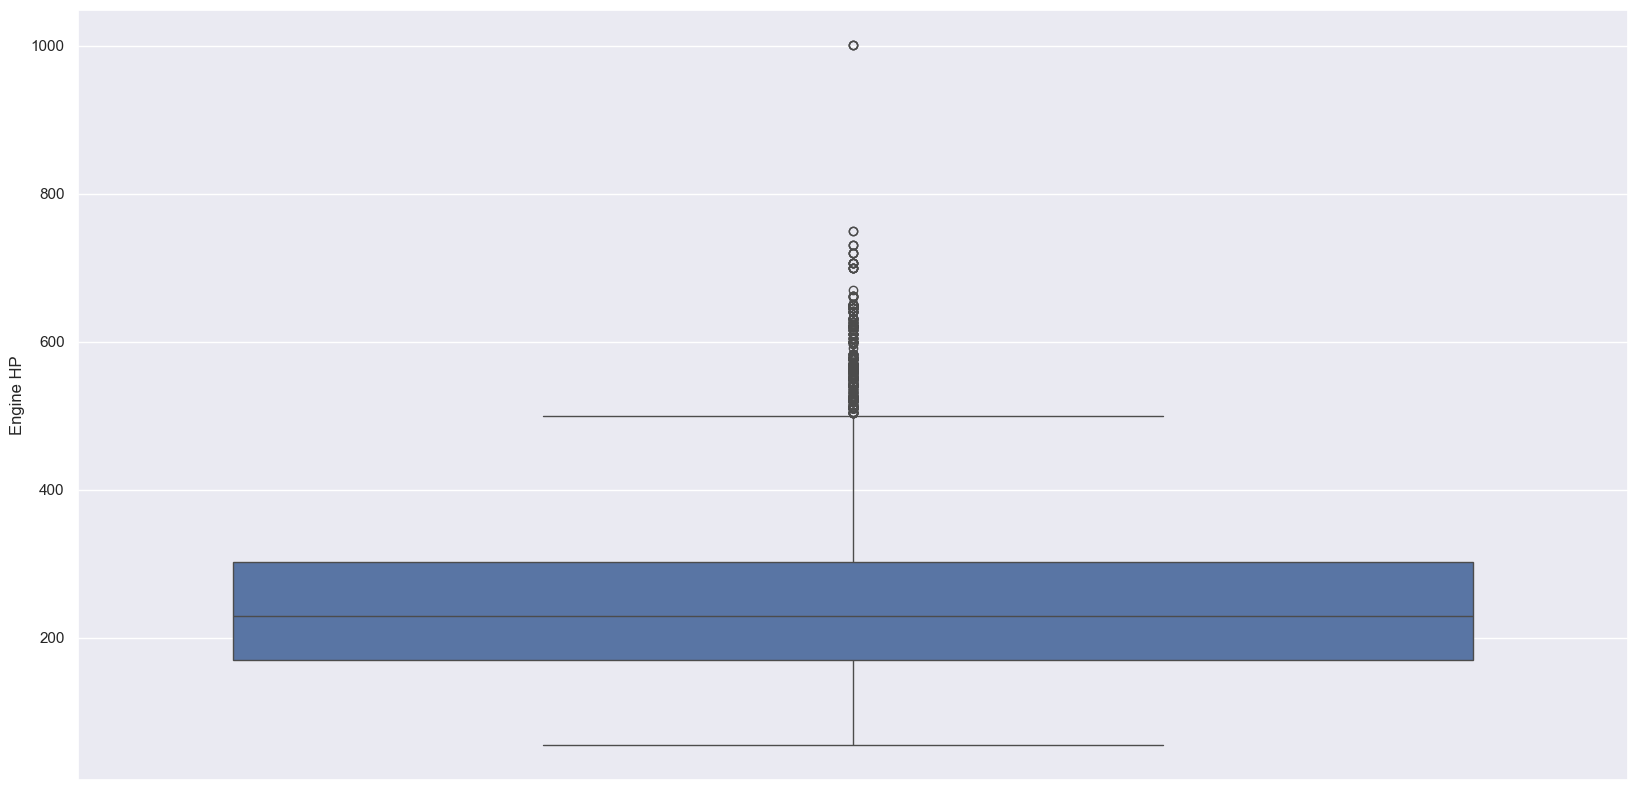

In [38]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['Engine HP'])

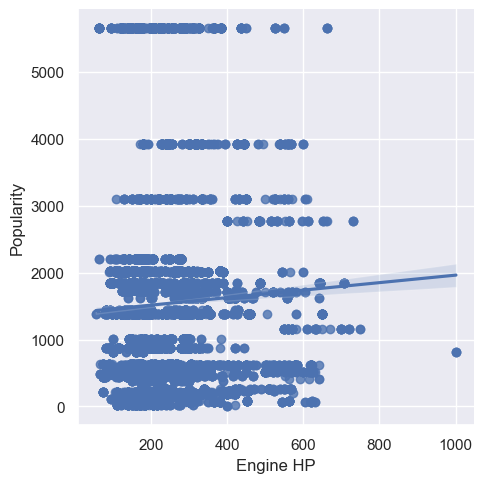

In [39]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

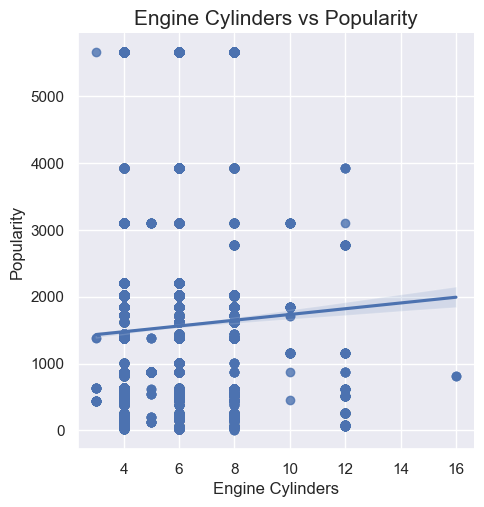

In [40]:
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)
plt.title("Engine Cylinders vs Popularity", fontsize = 15)
plt.show()

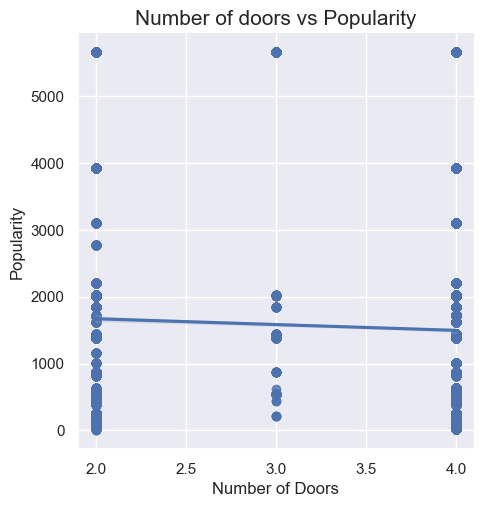

In [41]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity", fontsize = 15)
plt.show()

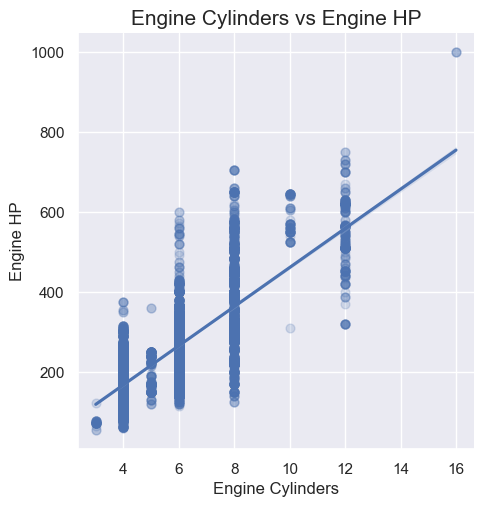

In [42]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

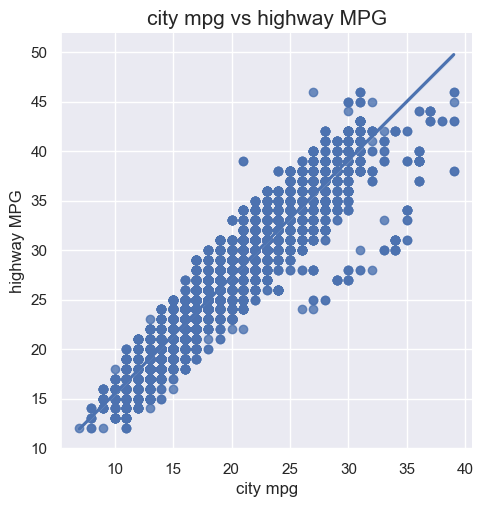

In [43]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

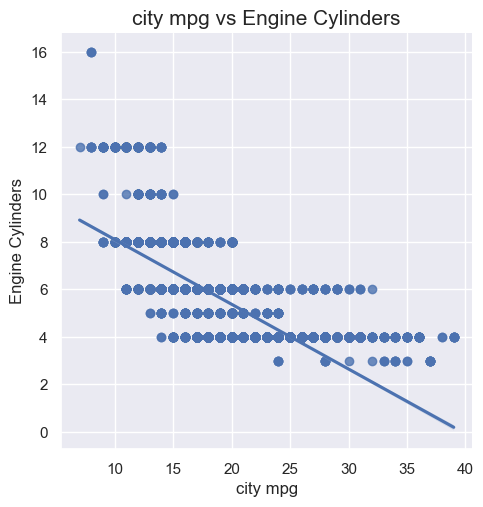

In [44]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

<Axes: >

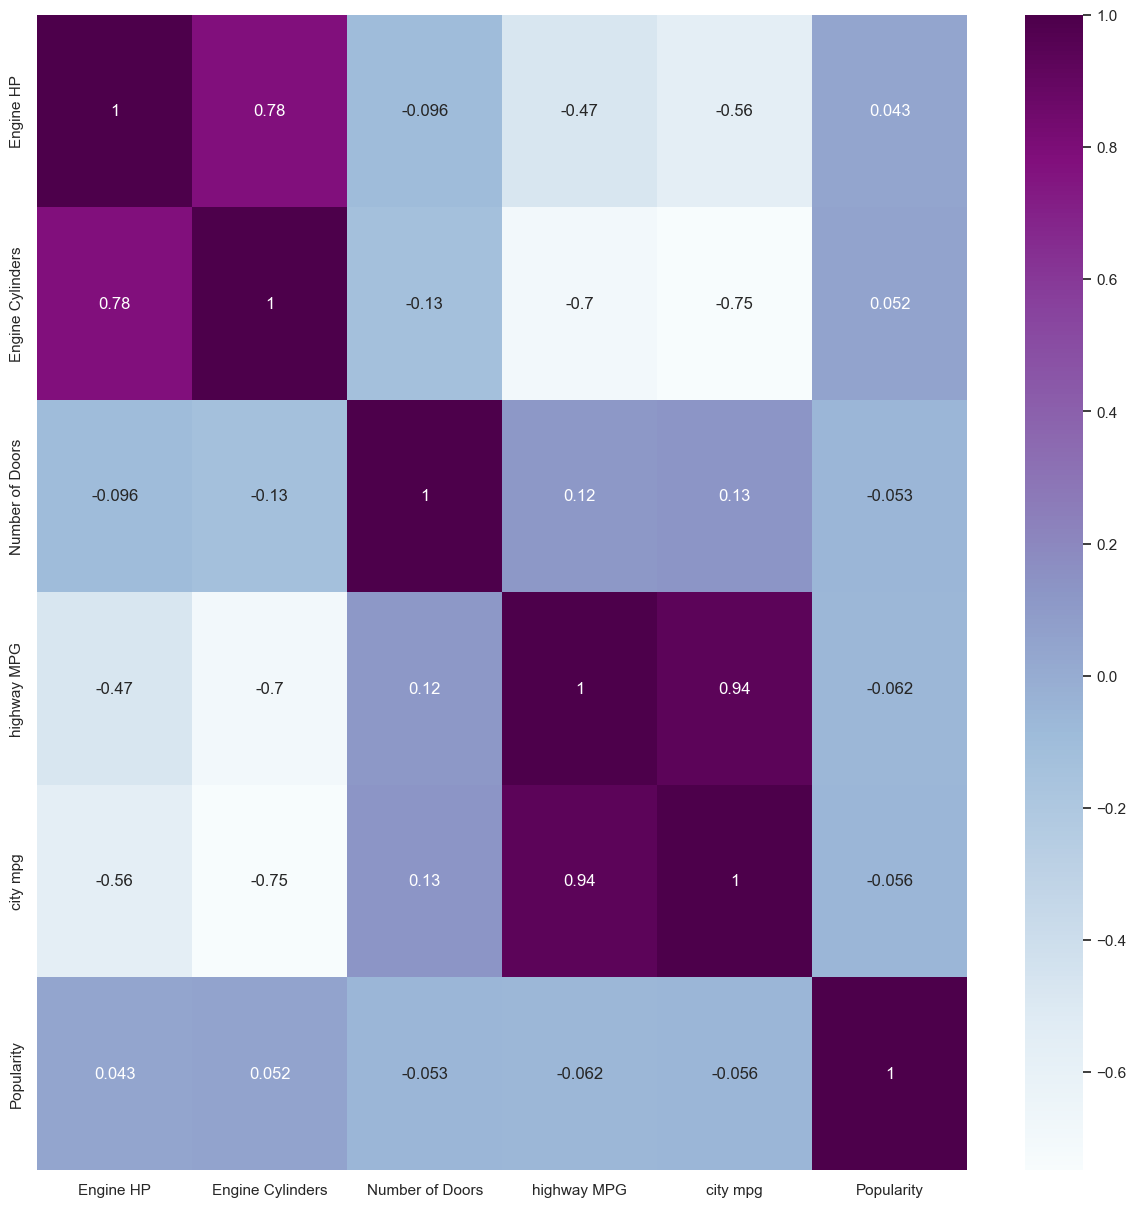

In [45]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

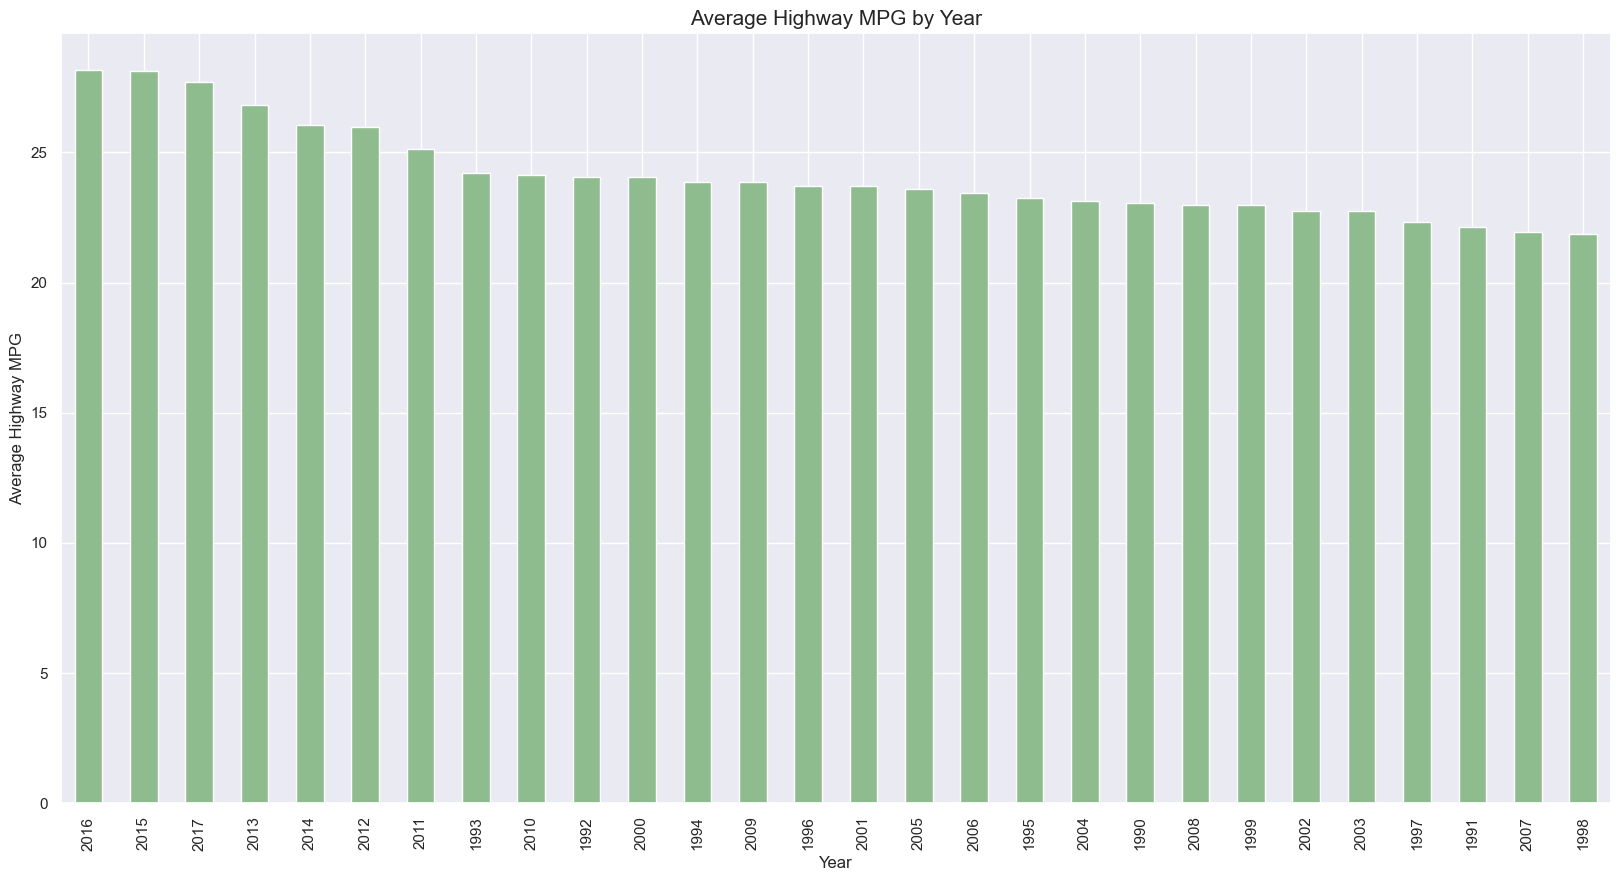

In [46]:
# Group by 'Year' and calculate only the mean of 'highway MPG'
avg_highway_mpg_by_year = data.groupby('Year')['highway MPG'].mean().sort_values(ascending=False)

# Plot the result
plt.figure(figsize=(20, 10))
avg_highway_mpg_by_year.plot(kind='bar', color='darkseagreen')

# Add plot title and labels
plt.title("Average Highway MPG by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Highway MPG")
plt.grid(True)
plt.show()


In [47]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [48]:
data['Number of Doors'].median()

np.float64(4.0)

In [49]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [50]:
data['Number of Doors'].isnull().sum()

np.int64(0)

In [51]:
data['Present Year'] = 2021

In [52]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [53]:
from sklearn.model_selection import train_test_split

# Select the features to use for prediction
features = ['Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values in required columns
model_data = data[features + [target]].dropna()

# Define X and y
X = model_data[features]
y = model_data[target]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Align X and y (just in case)
X, y = X.align(y, join='inner', axis=0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display first few rows of training data
X_train.head()


,Year,Engine HP,Engine Cylinders,city mpg,highway MPG,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Transmission Type_UNKNOWN,Driven_Wheels_all wheel drive,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
1311,2005,155.0,4.0,21,26,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
5151,2010,330.0,6.0,18,25,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4319,2016,365.0,6.0,15,20,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7222,2010,150.0,5.0,20,29,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4259,2011,276.0,6.0,18,27,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False


In [54]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

# Features including 'Make' for encoding
features = ['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Driven_Wheels', 'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values in required columns
model_data = data[features + [target]].dropna()

# Split data
X = model_data[features].copy()
y = model_data[target].copy()

# Apply Target Encoding to 'Make'
encoder = TargetEncoder(cols=['Make'])
X['Make'] = encoder.fit_transform(X['Make'], y)

# One-hot encode the rest of categorical columns
X = pd.get_dummies(X, columns=['Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show encoded training data
X_train.head()


,Make,Year,Engine HP,Engine Cylinders,city mpg,highway MPG,Transmission Type_AUTOMATED_MANUAL,Transmission Type_AUTOMATIC,Transmission Type_MANUAL,Transmission Type_UNKNOWN,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
1311,17907.207977,2005,155.0,4.0,21,26,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5151,42394.212121,2010,330.0,6.0,18,25,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4319,27386.753521,2016,365.0,6.0,15,20,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7222,28063.793711,2010,150.0,5.0,20,29,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4259,60961.836217,2011,276.0,6.0,18,27,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [55]:
from sklearn.model_selection import train_test_split

# Define features including 'Engine Fuel Type'
features = ['Engine Fuel Type', 'Year', 'Engine HP', 'Engine Cylinders', 
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 
            'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Remove missing data
model_data = data[features + [target]].dropna()

# Split into features (X) and target (y)
X = model_data[features].copy()
y = model_data[target].copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in 'Engine Fuel Type'
X_train["Engine Fuel Type"].unique()


array(['regular unleaded', 'premium unleaded (required)',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas'],
      dtype=object)

In [56]:
from sklearn.model_selection import train_test_split

# Define the features and target
features = ['Engine Fuel Type', 'Year', 'Engine HP', 'Engine Cylinders',
            'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 
            'Vehicle Style', 'city mpg', 'highway MPG']
target = 'MSRP'

# Drop rows with missing values
model_data = data[features + [target]].dropna()

# Separate features and target
X = model_data[features].copy()
y = model_data[target].copy()

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
                               'Vehicle Size', 'Vehicle Style'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show first few rows of X_train
X_train.head()


,Year,Engine HP,Engine Cylinders,city mpg,highway MPG,Engine Fuel Type_diesel,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
4318,2016,365.0,6.0,16,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4627,1998,220.0,8.0,13,16,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3930,2017,288.0,6.0,15,22,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11352,2016,109.0,4.0,31,40,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2762,2012,242.0,5.0,17,23,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [57]:
# Replace Cell 56 with:
features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
            'Vehicle Size', 'Vehicle Style', 'Year', 'Engine HP', 
            'Engine Cylinders', 'city mpg', 'highway MPG']
target = 'MSRP'

model_data = data[features + [target]].dropna()
X = model_data[features]
y = np.log1p(model_data[target])  # Log-transform the target!

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 
            'Vehicle Size', 'Vehicle Style', 'Year', 'Engine HP', 
            'Engine Cylinders', 'city mpg', 'highway MPG']
target = 'MSRP'

# Clean data
model_data = data[features + [target]].dropna()
X = model_data[features].copy()
y = model_data[target].copy()

# Split before encoding
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns
categorical_cols = ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
numerical_cols = ['Year', 'Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG']

# OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train_raw[categorical_cols])

one_hot_encoded_output_train = pd.DataFrame(
    encoder.transform(X_train_raw[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_train_raw.index
)

one_hot_encoded_output_test = pd.DataFrame(
    encoder.transform(X_test_raw[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_test_raw.index
)

# Combine numeric and encoded features
X_train = pd.concat([X_train_raw[numerical_cols].reset_index(drop=True), 
                     one_hot_encoded_output_train.reset_index(drop=True)], axis=1)

X_test = pd.concat([X_test_raw[numerical_cols].reset_index(drop=True), 
                    one_hot_encoded_output_test.reset_index(drop=True)], axis=1)

# Show result
X_train.head()


,Year,Engine HP,Engine Cylinders,city mpg,highway MPG,Engine Fuel Type_diesel,Engine Fuel Type_flex-fuel (premium unleaded recommended/E85),Engine Fuel Type_flex-fuel (premium unleaded required/E85),Engine Fuel Type_flex-fuel (unleaded/E85),Engine Fuel Type_natural gas,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2016,365.0,6.0,16,22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1998,220.0,8.0,13,16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2017,288.0,6.0,15,22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016,109.0,4.0,31,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2012,242.0,5.0,17,23,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Drop original categorical columns from raw data if still present
for col in ['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']:
    if col in X_train.columns:
        X_train.drop(col, axis=1, inplace=True)
    if col in X_test.columns:
        X_test.drop(col, axis=1, inplace=True)


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 40 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           9328 non-null   int64  
 1   Engine HP                                                      9328 non-null   float64
 2   Engine Cylinders                                               9328 non-null   float64
 3   city mpg                                                       9328 non-null   int64  
 4   highway MPG                                                    9328 non-null   int64  
 5   Engine Fuel Type_diesel                                        9328 non-null   float64
 6   Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)  9328 non-null   float64
 7   Engine Fuel Type_flex-fuel (premium unleaded required/E85)  

In [61]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [62]:
X_train_new.shape

(9328, 40)

In [63]:
error_mean_square = []
error_mean_absolute = []

In [64]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

In [65]:
y_predict = model.predict(X_test_new)

In [66]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [67]:
error_mean_absolute

[18853]

In [68]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [69]:
y_predict.head()

,Predicted Output
0,-2432.923234
1,-7031.284506
2,64533.005813
3,57870.589448
4,107200.247041


In [70]:
y_test.to_frame().head()

,MSRP
10063,2000
2658,2740
11471,39995
11038,50030
6818,59200


In [71]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [72]:
results.head()

,Predicted Output,MSRP
0,-2432.923234,2000
1,-7031.284506,2740
2,64533.005813,39995
3,57870.589448,50030
4,107200.247041,59200


In [73]:

# Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict in log scale, then reverse
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test_log)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)

print("✅ Log-Transformed Model Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")




✅ Log-Transformed Model Evaluation:
Mean Absolute Error (MAE): $13,382.65
R² Score: 0.534


In [74]:
# [NEW CELL] Prepare raw data without any encoding
# -------------------------------------------------
features = [
    'Engine Fuel Type',  # Keep as original text
    'Transmission Type', # Keep as original text 
    'Driven_Wheels',    # Keep as original text
    'Vehicle Size',     # Keep as original text
    'Vehicle Style',    # Keep as original text
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'city mpg',
    'highway MPG'
]
target = 'MSRP'

# Get raw data (no encoding yet)
model_data = data[features + [target]].dropna()
X = model_data[features]  # Features (still contains text categories)
y = model_data[target]    # Target

# Split data (still raw)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Verify - you should see text values in categorical columns
print("Raw X_train (before encoding):")
print(X_train.head())

Raw X_train (before encoding):
       Engine Fuel Type Transmission Type      Driven_Wheels Vehicle Size  \
4318   regular unleaded         AUTOMATIC   rear wheel drive        Large   
4627   regular unleaded            MANUAL   four wheel drive        Large   
3930   regular unleaded         AUTOMATIC  front wheel drive      Midsize   
11352  regular unleaded         AUTOMATIC  front wheel drive      Compact   
2762   regular unleaded         AUTOMATIC   rear wheel drive      Compact   

             Vehicle Style  Year  Engine HP  Engine Cylinders  city mpg  \
4318               4dr SUV  2016      365.0               6.0        16   
4627   Extended Cab Pickup  1998      220.0               8.0        13   
3930               4dr SUV  2017      288.0               6.0        15   
11352                Sedan  2016      109.0               4.0        31   
2762   Extended Cab Pickup  2012      242.0               5.0        17   

       highway MPG  
4318            22  
4627         

In [75]:
# [NEW CELL] Pipeline that handles encoding + scaling + training
# --------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import joblib
import os
import numpy as np

# Define which columns are categorical vs. numeric
categorical_features = [
    'Engine Fuel Type',
    'Transmission Type', 
    'Driven_Wheels',
    'Vehicle Size',
    'Vehicle Style'
]
numeric_features = [
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'city mpg',
    'highway MPG'
]

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Scale numeric features
        ('num', StandardScaler(), numeric_features),
        # One-hot encode categoricals
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Handles all encoding/scaling
    ('regressor', LinearRegression())  # Your model
])

# Train the pipeline (it will auto-encode categories)
pipeline.fit(X_train, np.log1p(y_train))

# Save the trained pipeline
model_dir = 'D:/CarDealerWeb-Django/CarDealerWeb-Django/ml'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(pipeline, os.path.join(model_dir, 'car_price_pipeline.pkl'))
print("✅ Pipeline saved! Ready for predictions.")

✅ Pipeline saved! Ready for predictions.


In [76]:
# New Cell 73 - Test the pipeline
# Sample input matching your Django model fields
sample_input = {
    'Engine Fuel Type': 'premium unleaded (required)',
    'Transmission Type': 'MANUAL',
    'Driven_Wheels': 'rear wheel drive',
    'Vehicle Size': 'Compact',
    'Vehicle Style': 'Coupe',
    'Year': 2020,
    'Engine HP': 300,
    'Engine Cylinders': 6,
    'city mpg': 20,
    'highway MPG': 28
}

# Convert to DataFrame with CORRECT COLUMN ORDER
features_order = numeric_features + categorical_features
sample_df = pd.DataFrame([sample_input])[features_order]

# Predict
pred_log_price = pipeline.predict(sample_df)
pred_price = int(np.expm1(pred_log_price)[0])
print(f"✅ Test Prediction: ${pred_price:,.2f}")



✅ Test Prediction: $104,343.00


In [77]:
# New Cell 74 - Verify feature names
print("Pipeline feature order after preprocessing:")
print(pipeline.named_steps['preprocessor'].get_feature_names_out())


Pipeline feature order after preprocessing:
['num__Year' 'num__Engine HP' 'num__Engine Cylinders' 'num__city mpg'
 'num__highway MPG' 'cat__Engine Fuel Type_diesel'
 'cat__Engine Fuel Type_flex-fuel (premium unleaded recommended/E85)'
 'cat__Engine Fuel Type_flex-fuel (premium unleaded required/E85)'
 'cat__Engine Fuel Type_flex-fuel (unleaded/E85)'
 'cat__Engine Fuel Type_natural gas'
 'cat__Engine Fuel Type_premium unleaded (recommended)'
 'cat__Engine Fuel Type_premium unleaded (required)'
 'cat__Engine Fuel Type_regular unleaded'
 'cat__Transmission Type_AUTOMATED_MANUAL'
 'cat__Transmission Type_AUTOMATIC' 'cat__Transmission Type_MANUAL'
 'cat__Transmission Type_UNKNOWN' 'cat__Driven_Wheels_all wheel drive'
 'cat__Driven_Wheels_four wheel drive'
 'cat__Driven_Wheels_front wheel drive'
 'cat__Driven_Wheels_rear wheel drive' 'cat__Vehicle Size_Compact'
 'cat__Vehicle Size_Large' 'cat__Vehicle Size_Midsize'
 'cat__Vehicle Style_2dr Hatchback' 'cat__Vehicle Style_2dr SUV'
 'cat__Vehic